# Preliminary data exploration for the Lending Club data set

This workbook is for me to familiarize myself with the data we have

In [2]:
# standard headers copied from HW 4
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from statsmodels.regression.linear_model import OLS
import sklearn.preprocessing as Preprocessing
from sklearn import ensemble
import itertools as it
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp

from itertools import combinations
%matplotlib inline

In [3]:
# Andrew's additional top-level setup
plt.style.use('ggplot')  # looks better and is more informative
from collections import namedtuple  # makes returning complex values less error-prone

In [4]:
# Read in the raw data taken from TODO put url here
raw_lc_data = pd.read_csv('data/loan.csv',
                         )

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TODO: We got the following warning:

```C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
```

so we'll have to pay particular attention to columns 19 and 55.

In [5]:
for date_column in [
    'issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'earliest_cr_line'
]:
    print date_column
    raw_lc_data[date_column] = pd.to_datetime(raw_lc_data[date_column],
                                              format='%b-%Y')

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
earliest_cr_line


In [6]:
print raw_lc_data.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'inq_last_6mths',
       u'mths_since_last_delinq', u'mths_since_last_record', u'open_acc',
       u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'initial_list_status', u'out_prncp', u'out_prncp_inv', u'total_pymnt',
       u'total_pymnt_inv', u'total_rec_prncp', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'last_pymnt_d', u'last_pymnt_amnt', u'next_pymnt_d',
       u'last_credit_pull_d', u'collections_12_mths_ex_med',
       u'mths_since_last_major_derog', u'policy_code', u'application_type',
       u'annu

In [7]:
del raw_lc_data['url']  # redundant and messes stuff up

In [8]:
raw_lc_data.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [9]:
null_counts = raw_lc_data.isnull().sum(axis=0)
null_counts[null_counts > 0].sort_values()

annual_inc                          4
acc_now_delinq                     29
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
open_acc                           29
pub_rec                            29
total_acc                          29
last_credit_pull_d                 53
collections_12_mths_ex_med        145
title                             151
revol_util                        502
last_pymnt_d                    17659
emp_title                       51457
total_rev_hi_lim                70276
tot_coll_amt                    70276
tot_cur_bal                     70276
next_pymnt_d                   252971
mths_since_last_delinq         454312
mths_since_last_major_derog    665676
mths_since_last_record         750326
desc                           761350
inq_fi                         866007
all_util                       866007
max_bal_bc                     866007
open_rv_24m                    866007
open_rv_12m 

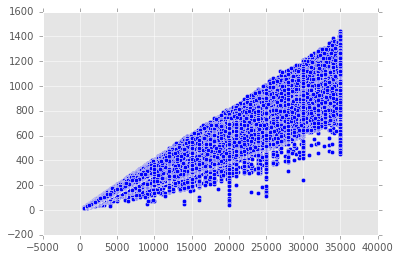

In [34]:
plt.scatter(raw_lc_data['loan_amnt'], raw_lc_data['installment'])
plt.show()

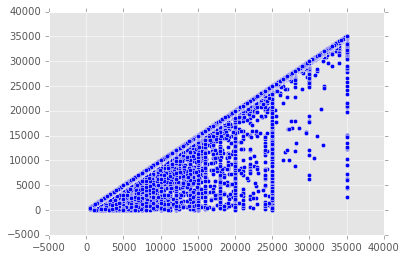

In [35]:
plt.scatter(raw_lc_data.funded_amnt, raw_lc_data.funded_amnt_inv)
plt.show()

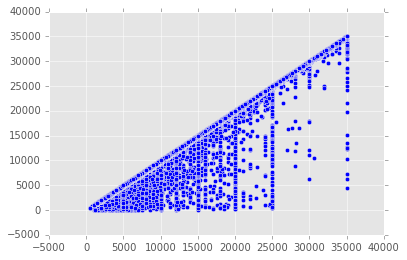

In [36]:
plt.scatter(raw_lc_data.funded_amnt[raw_lc_data.loan_status=='Fully Paid'],
            raw_lc_data.funded_amnt_inv[raw_lc_data.loan_status=='Fully Paid'])
plt.show()

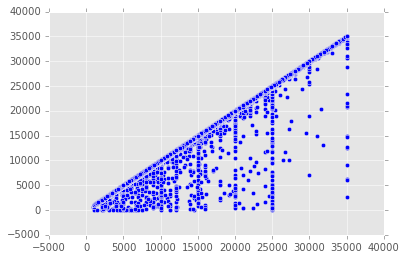

In [37]:
plt.scatter(raw_lc_data.funded_amnt[raw_lc_data.loan_status=='Charged Off'],
            raw_lc_data.funded_amnt_inv[raw_lc_data.loan_status=='Charged Off'])
plt.show()

In [10]:
def cleanup_emp_title(s):
    s = str(s).strip()
    if s == 'nan':
        return ''
    s = s.lower()
    s = s.replace('united states', 'us')
    s = s.replace(' llc', '')
    s = s.replace('.', '')
    s = s.replace(',', '')
    s = s.replace('-', '')
    if s.endswith(' inc'):
        s = s[:-4]
    s = s.replace(' ', '')
    if s == 'self':
        s = 'selfemployed'
    if s == 'usps':
        s = 'uspostalservice'
    if s == 'usaf':
        s = 'usairforce'
    if s.endswith('bank'):
        s = s[:-4]
    if s.endswith('corp'):
        s = s[:-4]
    return s

for y in range(2007, 2014):
    print y
    print raw_lc_data[raw_lc_data.issue_d.dt.year == y].emp_title.apply(cleanup_emp_title).value_counts()
    print '-------'

2007
                                  54
selfemployed                       8
bankofamerica                      4
usgovernment                       3
bestbuy                            3
usairforce                         3
affinitymarketinggroup             3
usarmy                             3
rougemoira                         2
danielmauk                         2
homedepot                          2
education                          2
smartpropertiesorgconstruction     2
metratech                          2
impress                            2
jam'insubz                         2
cwiresources                       2
whitneynational                    1
hbeck                              1
totalwellnesscenter                1
eklektikart                        1
jb&pplumbing                       1
easternbagandpaper                 1
vgtech                             1
businessadvancementcenter          1
pressler&pressler                  1
srainternational                 

In [11]:
def good_bad_quantile_plot(data, column):
    col_data = data[column]
    #if col_data.dtype == '<M8[ns]':
    #    col_data = col_data.dt.strftime('%Y-%m')
    defaults = data['loan_status'] == 'Charged Off'  # for now TODO

    nulls = pd.isnull(col_data)
    col_data = col_data[~nulls]
    defaults = defaults[~nulls]
    
    # 45-degree line
    plt.plot(
        [min(col_data), max(col_data)],
        [min(col_data), max(col_data)],
        c='k'
    )
    # Actual qq plot
    plt.plot(
        list(col_data[~defaults].quantile(q=np.arange(0.0, 1.005, .005))),
        list(col_data[defaults].quantile(q=np.arange(0.0, 1.0005, .005))),
        c='r'
    )
    plt.scatter(
        list(col_data[~defaults].quantile(q=np.arange(0.0, 1.1, .1))),
        list(col_data[defaults].quantile(q=np.arange(0.0, 1.1, .1))),
        c='r'
    )
    plt.title("QQ plot for " + column)
    plt.xlabel('Good loans')
    plt.ylabel('Bad loans')
    plt.savefig('img_' + column + '.png', bbox_inches='tight')

    plt.show()

In [12]:
# Let's create a helper function that will explore each column
def explore_column(data, c):
    print '---------------------------'
    col_data = data[c]
    nulls = pd.isnull(col_data)
    col_data = col_data[~nulls]
    if col_data.dtype == '<M8[ns]':
        col_data = col_data.dt.strftime('%Y-%m')
    defaults = data['loan_status'] == 'Charged Off'  # for now TODO
    
    # Does it have a small number of values?
    vcounts = col_data.value_counts()
    vcounts_default = col_data[defaults].value_counts()[vcounts.index]
    
    print "%s: dtype=%s, %d nulls, count vals=%d" % (
        c, col_data.dtype, sum(nulls), len(vcounts)
    )
    # Is it categorical?
    if len(vcounts) < 20 or col_data.dtype == 'O':
        print "Total number of distinct values: %d" % (len(vcounts), )

        if len(vcounts) > 20:
            # Reduce it to a reasonable number.
            vcounts = vcounts[0:19].append(pd.Series(vcounts[19:].sum(), index=['Others']))
            vcounts_default = vcounts_default[0:19].append(pd.Series(vcounts_default[19:].sum(), index=['Others']))

        vcounts_default.fillna(0, inplace=True)
        vcounts_display = pd.DataFrame(vcounts)
        vcounts_display.columns = ['Total']
        vcounts_display['Good'] = vcounts - vcounts_default
        vcounts_display['Defaults'] = vcounts_default
        proportions = vcounts_default/vcounts
        vcounts_display['StdErr'] = (proportions * (1-proportions) / vcounts) ** 0.5
        vcounts_display['% Defaults'] = 100.0 * proportions
        vcounts_display['Lo Conf'] = proportions - 1.96 * vcounts_display['StdErr']
        vcounts_display['Hi Conf'] = proportions + 1.96 * vcounts_display['StdErr']
        
        vcounts_display['Label'] = vcounts.index
        vcounts_display.sort_values(by='% Defaults', inplace=True)
        print vcounts_display

        plt.figure(figsize=(15,6))
        plt.subplot(121)
        plt.title(c)
        plt.bar(range(len(vcounts)), vcounts, color='b')
        plt.bar(range(len(vcounts)), vcounts_default, color='r')
        plt.gca().set_xticks(np.arange(0.5, 0.5+len(vcounts)))
        plt.gca().set_xticklabels(vcounts.index, rotation='vertical')
        
        plt.subplot(122)
        plt.bar(0.45 + np.arange(len(vcounts)), 
                vcounts_display['Hi Conf']-vcounts_display['Lo Conf'],
                bottom = vcounts_display['Lo Conf'],
                width = 0.1,
                alpha = 0.7,
                color = 'b'
            )
        plt.scatter(0.5 + np.arange(len(vcounts)), 
                    vcounts_display['% Defaults'] / 100,
                    marker = 'o',
                    color = 'k'
            )
        plt.xlim(0, len(vcounts))
        
        plt.title("Default rate w/95% C.I by " + c)
        plt.ylabel('Default Rate')
        plt.gca().set_xticks(np.arange(0.5, 0.5+len(vcounts)))
        plt.gca().set_xticklabels(vcounts_display['Label'], rotation='vertical')
        plt.savefig('img_' + c + '.png', bbox_inches='tight')
        plt.show()
                
        return

    try:
        # It must be numeric at this point
        # We want to see Quartiles, 95% interval, min/max
        quantiles_good = col_data[~defaults].quantile(q=[0, 0.025, 0.25, 0.50, 0.75, 0.975, 1.0]).tolist()
        quantiles_defaults = col_data[defaults].quantile(q=[0, 0.025, 0.25, 0.50, 0.75, 0.975, 1.0]).tolist()
        print "     %10s  %10s  %10s  %10s  %10s  %10s  %10s" % (
            'Min', '2.5%', '25%', '50%', '75%', '97.5%', 'Max',
        )
        print "GOOD %10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f" % tuple(quantiles_good)
        print "BAD  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f  %10.2f" % tuple(quantiles_defaults)

        fig, axs = plt.subplots(2, 2, sharex=True, figsize=(12,5))

        plt.axes(axs[0][0])
        plt.title(c + " - Good")
        plt.hist(col_data[~defaults], bins=40, color='b')
        plt.axvline(x=col_data[~defaults].mean(), color='k')
        plt.xlim(col_data.min(), col_data.max())
        for q in quantiles_good:
            plt.axvline(x=q, color='b')

        plt.axes(axs[1][0])
        plt.title(c + " - Bad")
        plt.hist(col_data[defaults], bins=40, color='r')
        plt.axvline(x=col_data[defaults].mean(), color='k')
        plt.xlim(col_data.min(), col_data.max())
        for q in quantiles_defaults:
            plt.axvline(x=q, color='r')

        plt.subplot(122)
        good_bad_quantile_plot(data, c)

        plt.show()

    except Exception as e:
        print e
        raise

## Unit test the exploration function

In [8]:
explore_column(raw_lc_data, 'loan_status')

NameError: name 'explore_column' is not defined

In [ ]:
explore_column(raw_lc_data, 'sub_grade')

In [ ]:
explore_column(raw_lc_data, 'mths_since_last_record')

In [15]:
# We need to restrict our investigations to loans whose status is known
# We can look at the status values above
lc_data = raw_lc_data[raw_lc_data.loan_status.isin(['Fully Paid', 'Charged Off']) & (raw_lc_data.issue_d.dt.year > 2007)]
lc_data.shape

(252720, 73)

## Explore the data
Now that we have tested our exploration function, let's iterate over all the columns

TODO on the data exploration:

* Parse dates (done)
* Fix fields that throw exception when plotting (e.g., dates) (done)
* Show min/max as well as quantiles (done)
* Treat dates as special and make subplots per year (or turn histograms into line charts accompanied by boxplots per year)
* Graphically show distribution of categorical values (done)
* Hand-coded ranking/combining of categorical values
* Cutoff should be > 10 (done)
* Color-code by outcome (done)
* Identify missing values
* qq plots against likely inputs
* Discard rows whose outcome is right-censored by selecting the two terminal loan_status values (done)

## Discussion of each column

---------------------------
id: dtype=int64, 0 nulls, count vals=252720
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD   54734.00   465004.80  1441832.00  6254885.00  17243335.00  55118415.90  68604659.00
BAD    57167.00   505888.75  1570580.50  6583875.00  15084235.00  42513049.30  60516983.00


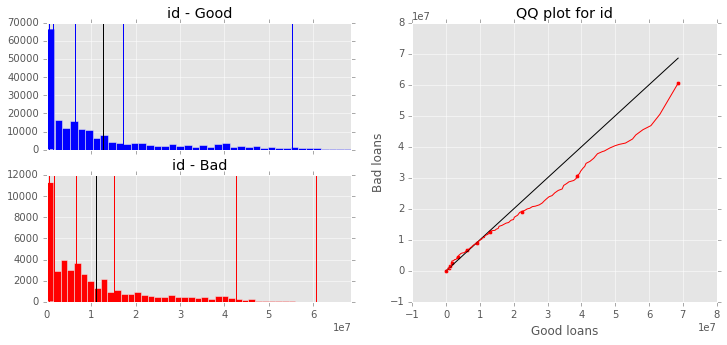

In [972]:
explore_column(lc_data, 'id')

* **id** Even though this doesn't show a difference between good and bad loans, it is interesting to see how the distribution of ids changes. Since this data set includes only loans that were funded, we might be able to approximate an estimate of what percentage of loans are approved.

---------------------------
member_id: dtype=int64, 0 nulls, count vals=252720
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD   80364.00   580204.20  1686927.00  7536885.00  19255534.00  58681945.10  73507418.00
BAD   137225.00   651331.35  1827775.50  8068453.00  16751444.50  45479766.05  64537751.00


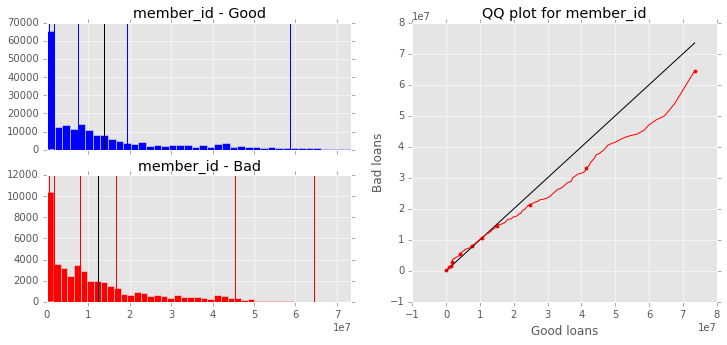

In [973]:
explore_column(lc_data, 'member_id')

* **member_id** Similar considerations come into play here as did for *id*

---------------------------
loan_amnt: dtype=float64, 0 nulls, count vals=1326
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD     500.00     2225.00     7200.00    12000.00    18000.00    35000.00    35000.00
BAD     1000.00     2500.00     8000.00    12675.00    20000.00    35000.00    35000.00


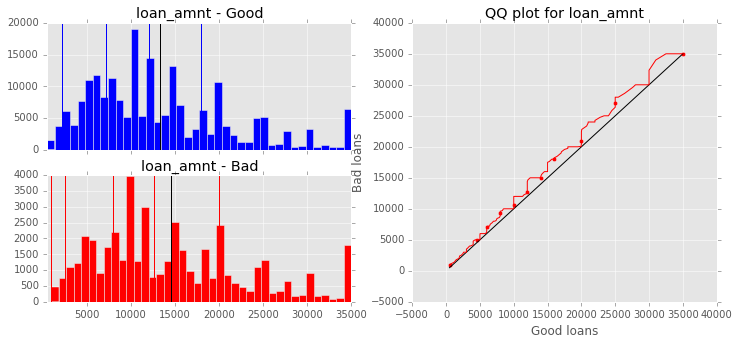

In [974]:
explore_column(lc_data, 'loan_amnt')

* **loan_amnt** These distributions look fairly similar, and I suspect that this column will have little independent value. However, it may have an interaction effect and we should keep it in our initial models.

---------------------------
funded_amnt: dtype=float64, 0 nulls, count vals=1326
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD     500.00     2200.00     7200.00    12000.00    18000.00    35000.00    35000.00
BAD     1000.00     2500.00     8000.00    12600.00    20000.00    35000.00    35000.00


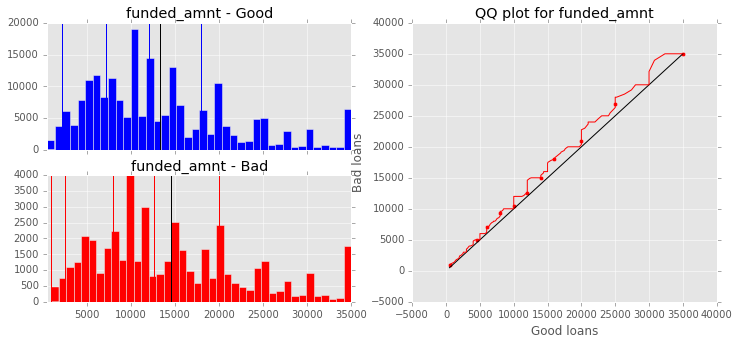

In [975]:
explore_column(lc_data, 'funded_amnt')

* **funded_amnt** is effectively the same as loan_amnt.

---------------------------
funded_amnt_inv: dtype=float64, 0 nulls, count vals=8447
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     2000.00     7000.00    11750.00    18000.00    34975.00    35000.00
BAD        0.00     2400.00     8000.00    12375.00    19975.00    35000.00    35000.00


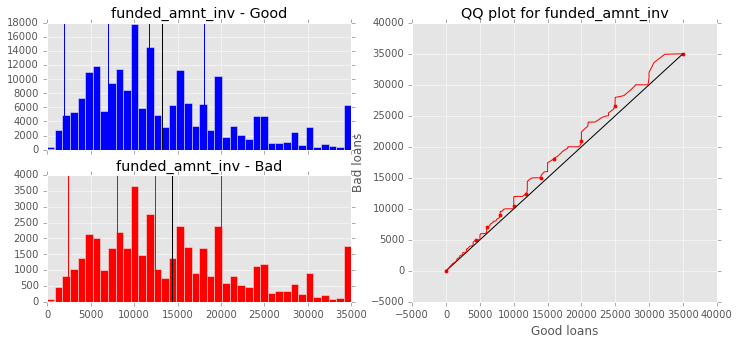

In [976]:
explore_column(lc_data, 'funded_amnt_inv')

* **funded_amnt_inv** is effectively the same as loan_amnt.

---------------------------
term: dtype=object, 0 nulls, count vals=2
Total number of distinct values: 2
             Total    Good  Defaults    StdErr  % Defaults   Lo Conf  \
 36 months  196407  167369     29038  0.000801   14.784605  0.146276   
 60 months   56313   40148     16165  0.001906   28.705627  0.283320   

             Hi Conf       Label  
 36 months  0.149416   36 months  
 60 months  0.290793   60 months  


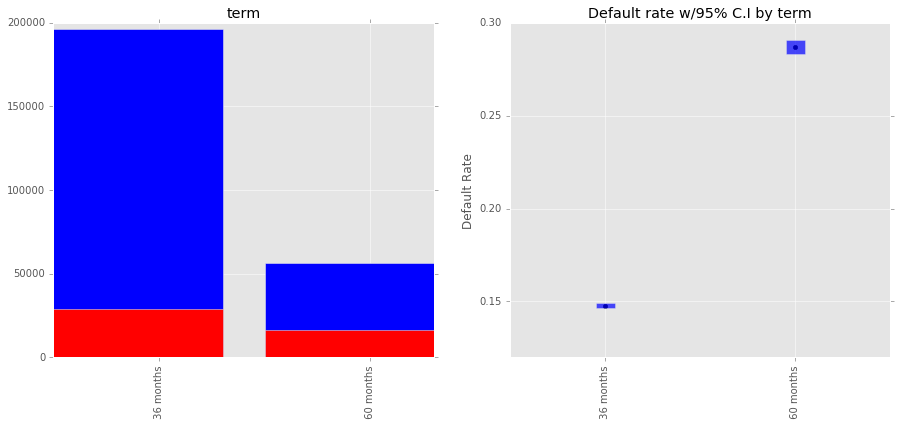

In [977]:
explore_column(lc_data, 'term')

* **term** 28% of the 60-month loans default, vs 14% of the 36-month loans. We will certainly want to inclue it in our model

---------------------------
int_rate: dtype=float64, 0 nulls, count vals=505
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       5.32        6.03       10.16       13.11       15.88       22.95       28.99
BAD        5.42        7.88       13.05       15.80       18.92       24.83       28.99


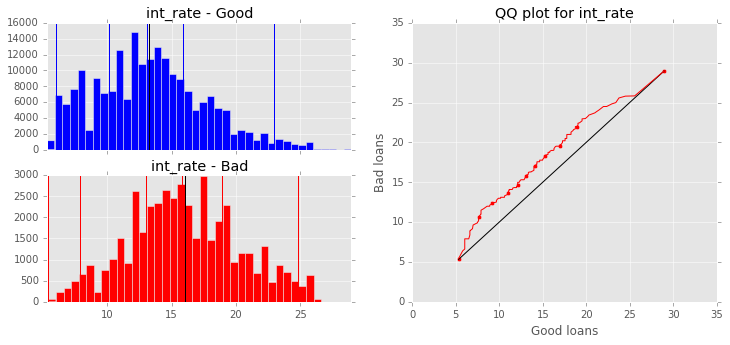

In [978]:
explore_column(lc_data, 'int_rate')

* **int_rate** is a field which LC derives from other inputs, using a proprietary formula which may change over time (even if we were to attempt to correct for changes in the underlying interest rate market). As such, we do not consider it a reliable predictor and we choose to exclude it.

---------------------------
installment: dtype=float64, 0 nulls, count vals=45405
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD      16.08       74.12      234.61      360.33      540.56     1029.92     1409.99
BAD       21.62       85.85      265.25      390.91      573.32     1033.05     1424.57


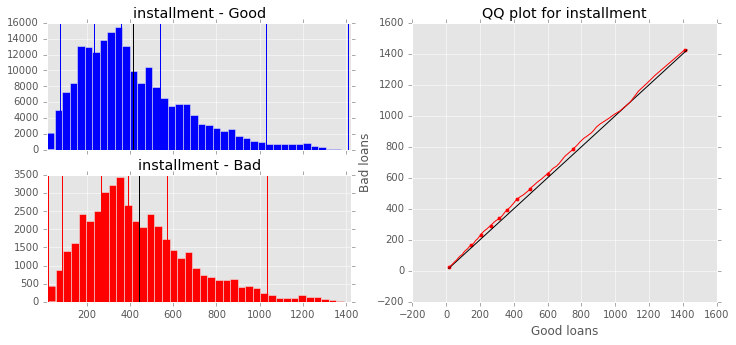

In [979]:
explore_column(lc_data, 'installment')

* **installment**

---------------------------
grade: dtype=object, 0 nulls, count vals=7
Total number of distinct values: 7
   Total   Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf Label
A  42239  39623      2616  0.001173    6.193328  0.059635  0.064232     A
B  76004  66493      9511  0.001200   12.513815  0.122786  0.127491     B
C  65245  52617     12628  0.001547   19.354740  0.190516  0.196579     C
D  40469  29998     10471  0.002177   25.874126  0.254474  0.263008     D
E  19172  12919      6253  0.003386   32.615272  0.319517  0.332789     E
F   7653   4721      2932  0.005557   38.311773  0.372226  0.394010     F
G   1938   1146       792  0.011167   40.866873  0.386782  0.430555     G


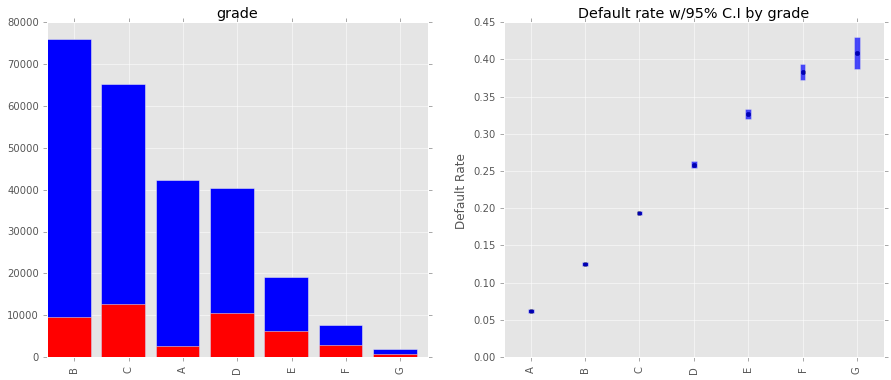

In [980]:
explore_column(lc_data, 'grade')

* **grade** is another proprietary formula that LC uses and whose definition may change over time. We prefer to exclude it from our analysis.

---------------------------
sub_grade: dtype=object, 0 nulls, count vals=35
Total number of distinct values: 35
        Total   Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
A2       6182   5905       277  0.002631    4.480751  0.039650  0.049965   
A3       7160   6762       398  0.002708    5.558659  0.050279  0.060894   
A4      11043  10264       779  0.002437    7.054243  0.065767  0.075318   
A5      11988  11007       981  0.002504    8.183183  0.076925  0.086739   
B1      12084  10871      1213  0.002734   10.038067  0.095023  0.105739   
B2      14619  13028      1591  0.002576   10.883097  0.103783  0.113879   
B3      18057  15800      2257  0.002461   12.499308  0.120169  0.129817   
B4      16919  14598      2321  0.002645   13.718305  0.131999  0.142367   
B5      14325  12196      2129  0.002972   14.862129  0.142796  0.154446   
C1      14938  12458      2480  0.003044   16.601955  0.160052  0.171987   
C2      14328  11800      2528  0.003185   17.643774

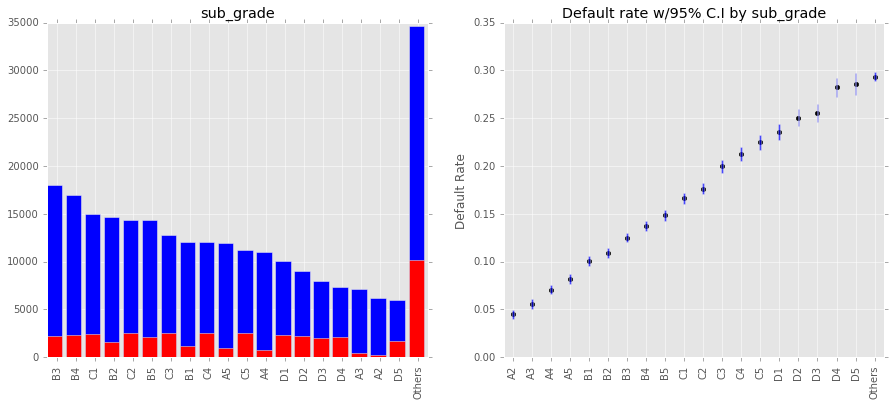

In [981]:
explore_column(lc_data, 'sub_grade')

* **sub_grade**, like `grade`, is a proprietary metric whose definition may change over time. 

---------------------------
emp_title: dtype=object, 13904 nulls, count vals=132599
Total number of distinct values: 132599
                   Total      Good  Defaults    StdErr  % Defaults   Lo Conf  \
Vice President       380     346.0      34.0  0.014642    8.947368  0.060775   
Engineer             470     411.0      59.0  0.015283   12.553191  0.095578   
Director             501     438.0      63.0  0.014813   12.574850  0.096715   
Project Manager      669     582.0      87.0  0.013004   13.004484  0.104557   
Accountant           355     307.0      48.0  0.018149   13.521127  0.099640   
Office Manager       568     488.0      80.0  0.014596   14.084507  0.112237   
Teacher             1909    1594.0     315.0  0.008496   16.500786  0.148357   
RN                   841     698.0     143.0  0.012954   17.003567  0.144646   
Others            225566  186215.0   39351.0  0.000799   17.445448  0.172888   
teacher              394     325.0      69.0  0.019148   17.512690  0.137597

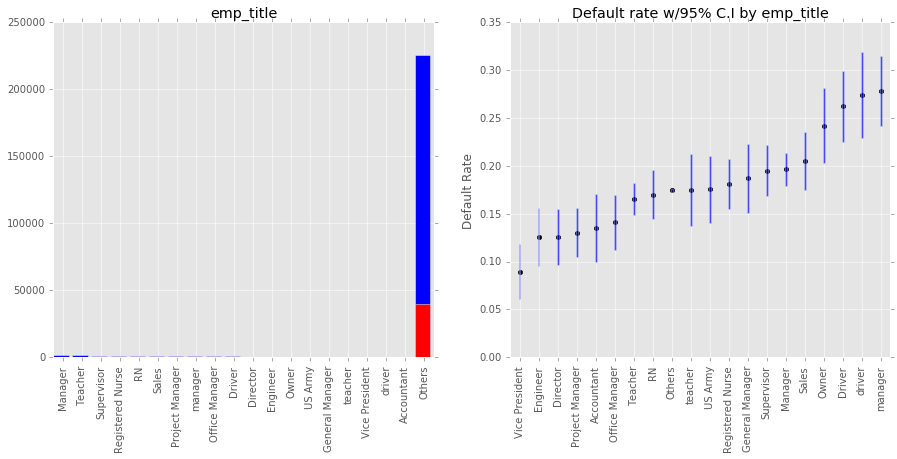

In [982]:
explore_column(lc_data, 'emp_title')

* **emp_title** is a factor with many possible values, some of which will undoubtedly show greater or lesser default rates. Whether those changes will turn out to be significant is worth investigating.

---------------------------
emp_length: dtype=object, 0 nulls, count vals=12
Total number of distinct values: 12
           Total   Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
10+ years  76854  63728     13126  0.001357   17.079137  0.168131  0.173452   
2 years    23530  19501      4029  0.002456   17.122822  0.166415  0.176042   
4 years    16185  13413      2772  0.002961   17.126969  0.165465  0.177074   
3 years    20358  16826      3532  0.002654   17.349445  0.168293  0.178696   
1 year     16811  13855      2956  0.002936   17.583725  0.170083  0.181592   
5 years    18052  14849      3203  0.002843   17.743186  0.171859  0.183005   
8 years    11840   9688      2152  0.003544   18.175676  0.174810  0.188703   
6 years    14742  12049      2693  0.003182   18.267535  0.176438  0.188913   
< 1 year   20815  16975      3840  0.002688   18.448234  0.179213  0.189752   
7 years    14077  11477      2600  0.003271   18.469844  0.178288  0.191109   
9 years     9559  

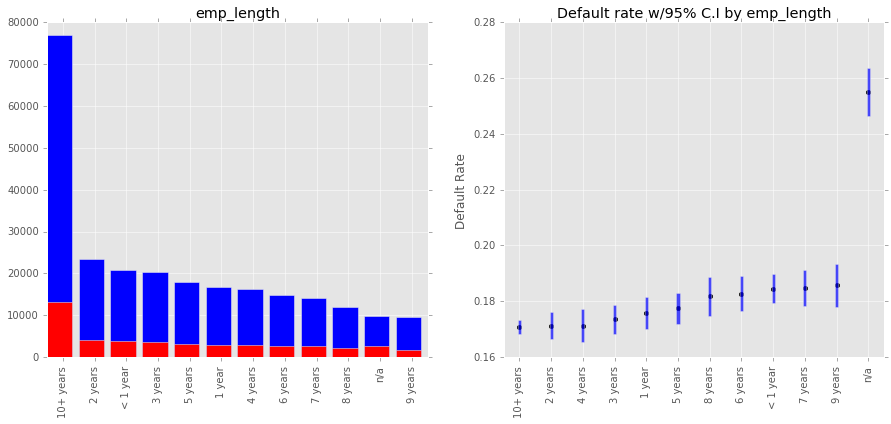

In [983]:
explore_column(lc_data, 'emp_length')

* **emp_length**

---------------------------
home_ownership: dtype=object, 0 nulls, count vals=6
Total number of distinct values: 6
           Total      Good  Defaults    StdErr  % Defaults   Lo Conf  \
ANY            1       1.0       0.0  0.000000    0.000000  0.000000   
MORTGAGE  124747  104890.0   19857.0  0.001036   15.917818  0.157148   
NONE          41      34.0       7.0  0.058764   17.073171  0.055554   
OWN        21963   17942.0    4021.0  0.002610   18.308064  0.177966   
OTHER        141     114.0      27.0  0.033136   19.148936  0.126542   
RENT      105827   84536.0   21291.0  0.001232   20.118684  0.198771   

           Hi Conf     Label  
ANY       0.000000       ANY  
MORTGAGE  0.161208  MORTGAGE  
NONE      0.285910      NONE  
OWN       0.188195       OWN  
OTHER     0.256437     OTHER  
RENT      0.203602      RENT  


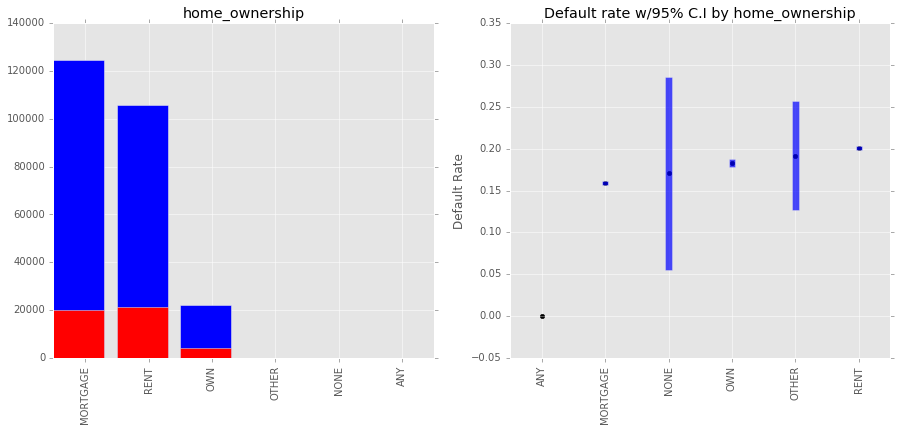

In [984]:
explore_column(lc_data, 'home_ownership')

* **home_ownership** seems likely to have an effect; `MORTGAGE` shows up with a much lower default rate than the other large cohorts. We should include this.

---------------------------
annual_inc: dtype=float64, 0 nulls, count vals=18959
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD    3000.00    24000.00    45000.00    63000.00    87000.00   151000.00   199992.00
BAD     4080.00    21000.00    40000.00    55271.02    76415.69   144000.00   199790.00


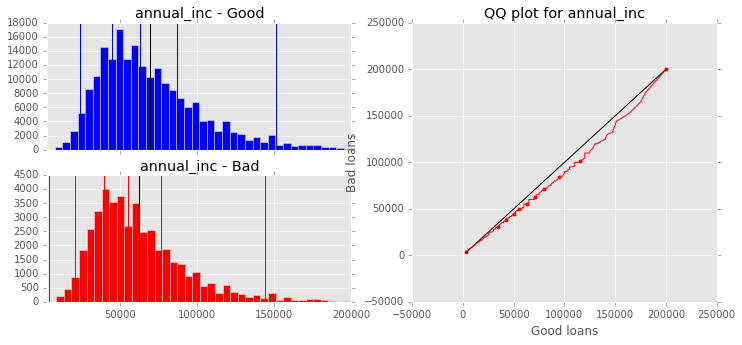

In [16]:
lc_data_trimmed = lc_data[['loan_status', 'annual_inc']][lc_data.annual_inc < 200000]
explore_column(lc_data_trimmed, 'annual_inc')

* **annual_inc** The extrema are messing up our exploratory chart, but just looking at the difference in quantiles between the "good" and "bad" cohorts, it's clear that this is an important predictor.

---------------------------
verification_status: dtype=object, 0 nulls, count vals=3
Total number of distinct values: 3
                 Total   Good  Defaults    StdErr  % Defaults   Lo Conf  \
Not Verified     85813  73650     12163  0.001191   14.173843  0.139405   
Source Verified  74011  60271     13740  0.001429   18.564808  0.182847   
Verified         92896  73596     19300  0.001331   20.775921  0.205150   

                  Hi Conf            Label  
Not Verified     0.144072     Not Verified  
Source Verified  0.188449  Source Verified  
Verified         0.210368         Verified  


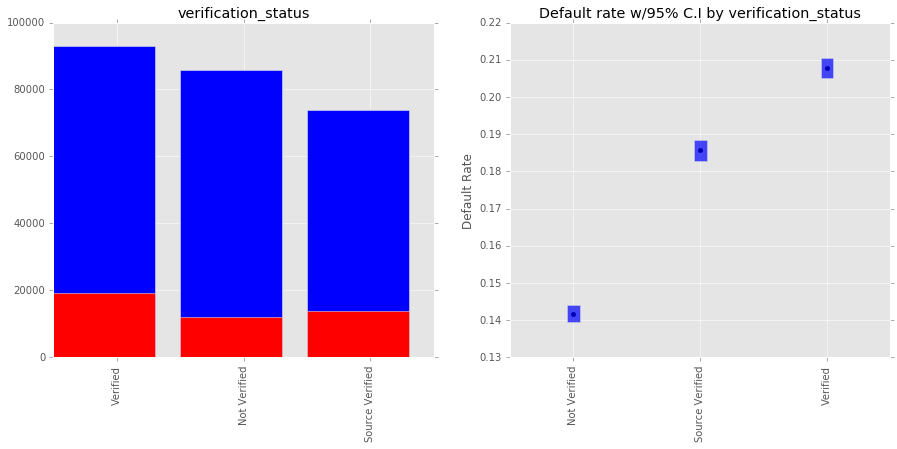

In [986]:
explore_column(lc_data, 'verification_status')

* **verification_status** The surprising thing here is that *verified* income information has a higher default rate than "not verified." This may have an interesting interaction term with income.

---------------------------
issue_d: dtype=object, 0 nulls, count vals=96
Total number of distinct values: 96
          Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
2012-10    5835    4946.0     889.0  0.004705   15.235647  0.143136  0.161577   
2012-09    5688    4798.0     890.0  0.004817   15.646976  0.147028  0.165911   
2012-11    5863    4932.0     931.0  0.004773   15.879243  0.149437  0.168148   
Others   130199  109415.0   20784.0  0.001015   15.963256  0.157643  0.161622   
2015-01    5591    4680.0     911.0  0.004939   16.294044  0.153260  0.172621   
2013-12    6623    5345.0    1278.0  0.004849   19.296391  0.183460  0.202468   
2014-01    6489    5214.0    1275.0  0.004933   19.648636  0.186819  0.206154   
2014-10    8727    7005.0    1722.0  0.004260   19.731867  0.188969  0.205669   
2013-11    6642    5287.0    1355.0  0.004945   20.400482  0.194314  0.213696   
2014-07    8527    6773.0    1754.0  0.004377   20.569954  0.197120  0.214279   

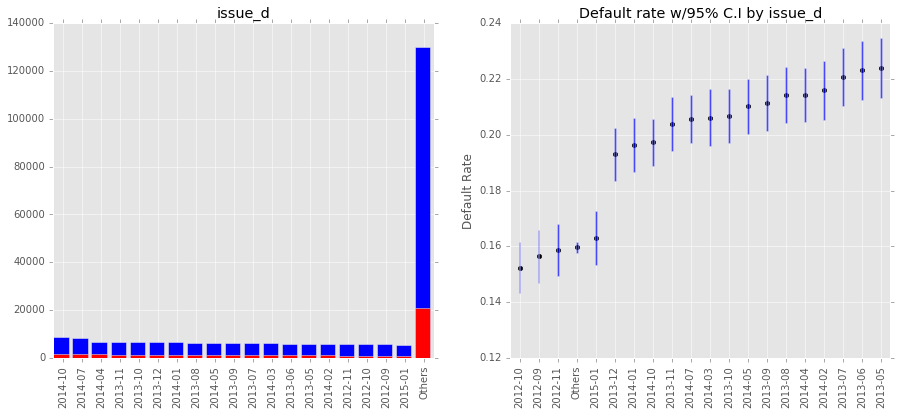

In [987]:
explore_column(lc_data, 'issue_d')

* **issue_d** The issue date of the loan itself has no useful value; even if there is a strong secular trend I would be disinclined to use it for predictions. On the other hand, to the degree that this allows us to correct for the strength of the economy in normalizing historical data, it should probably be included in our model.

---------------------------
loan_status: dtype=object, 0 nulls, count vals=2
Total number of distinct values: 2
              Total      Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  \
Fully Paid   207517  207517.0       0.0     0.0         0.0      0.0      0.0   
Charged Off   45203       0.0   45203.0     0.0       100.0      1.0      1.0   

                   Label  
Fully Paid    Fully Paid  
Charged Off  Charged Off  


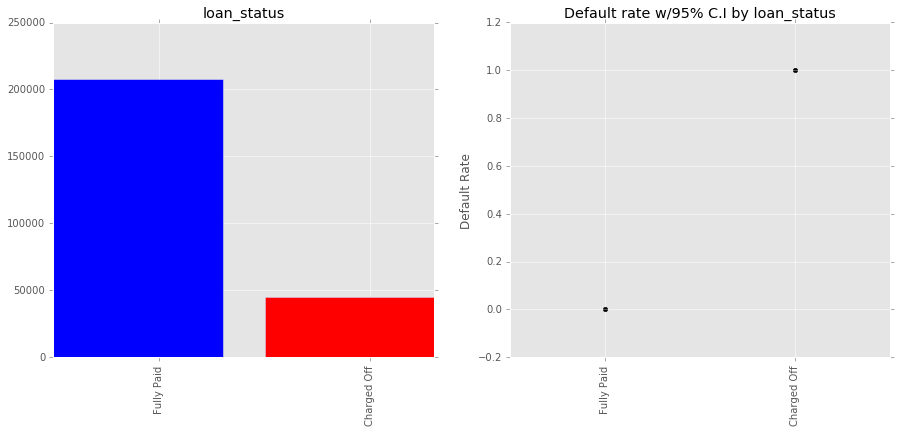

In [988]:
explore_column(lc_data, 'loan_status')

* **loan_status** is what we're trying to predict.

---------------------------
pymnt_plan: dtype=object, 0 nulls, count vals=2
Total number of distinct values: 2
    Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf Label
y       2       2.0       0.0  0.000000    0.000000  0.000000  0.000000     y
n  252718  207515.0   45203.0  0.000762   17.886735  0.177373  0.180362     n


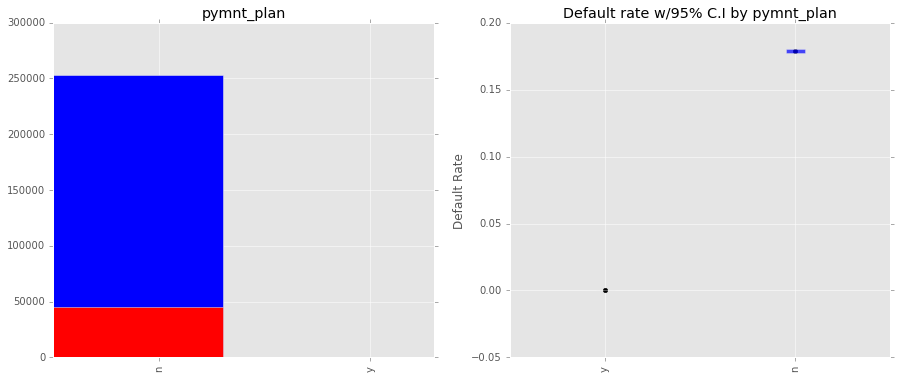

In [989]:
explore_column(lc_data, 'pymnt_plan')

* **pymnt_plan** does not have enough "y" values to be useful.

* **url** is really just a decorator around the id field, and can be discarded.

---------------------------
desc: dtype=object, 164646 nulls, count vals=87403
Total number of distinct values: 87403
                                                    Total     Good  Defaults  \
  Borrower added on 12/02/13 > Debt consolidati...      4      4.0       0.0   
  Borrower added on 07/12/13 > debt consolidati...      3      3.0       0.0   
  Borrower added on 12/16/13 > Debt consolidati...      4      4.0       0.0   
  Borrower added on 11/14/13 > Debt consolidati...      4      4.0       0.0   
  Borrower added on 01/14/13 > debt consolidati...      3      3.0       0.0   
  Borrower added on 11/19/13 > Debt consolidati...      4      4.0       0.0   
                                                      216    188.0      28.0   
Others                                              87780  72706.0   15074.0   
  Borrower added on 01/03/14 > Debt consolidati...      5      4.0       1.0   
  Borrower added on 03/17/14 > Debt consolidati...      4      3.0       1.0   
  

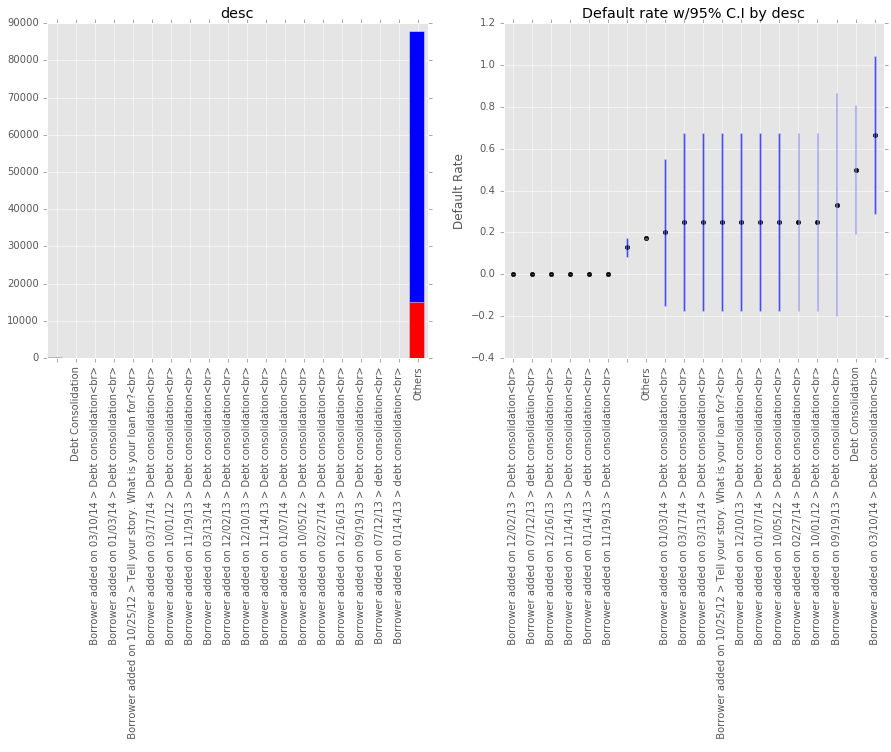

In [990]:
explore_column(lc_data, 'desc')

* **desc** This exploration is unable to start extracting features from the description field. We will deal with that separately. We certainly hope to focus on this.

---------------------------
purpose: dtype=object, 0 nulls, count vals=14
Total number of distinct values: 14
                     Total    Good  Defaults    StdErr  % Defaults   Lo Conf  \
car                   3643    3195       448  0.005441   12.297557  0.112311   
wedding               1947    1684       263  0.007746   13.507961  0.119897   
major_purchase        6260    5387       873  0.004378   13.945687  0.130875   
home_improvement     14907   12642      2265  0.002940   15.194204  0.146180   
credit_card          50033   42209      7824  0.001624   15.637679  0.153194   
vacation              1585    1315       270  0.009443   17.034700  0.151839   
educational            313     259        54  0.021357   17.252396  0.130665   
house                 1651    1365       286  0.009314   17.322835  0.154973   
debt_consolidation  148285  120701     27584  0.001011   18.602016  0.184040   
medical               2852    2283       569  0.007483   19.950912  0.184842   
renewable_

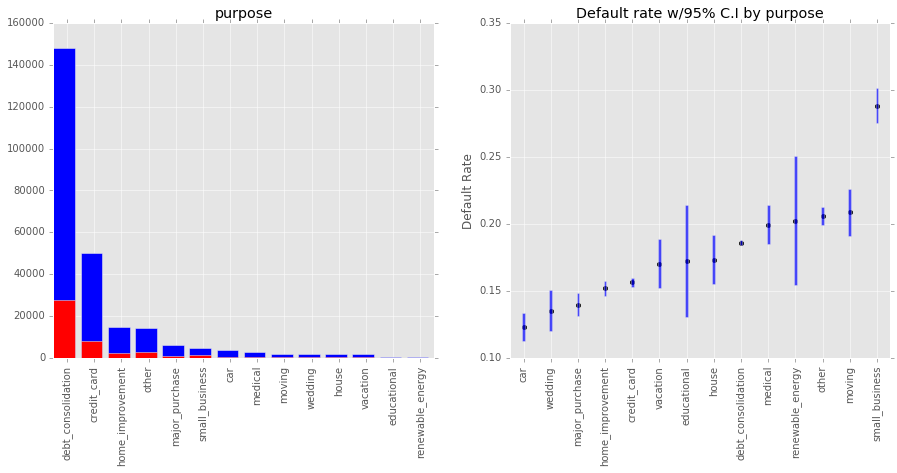

In [991]:
explore_column(lc_data, 'purpose')

* **purpose** clearly has strong predictive value and should be included.

---------------------------
title: dtype=object, 12 nulls, count vals=47785
Total number of distinct values: 47785
                            Total     Good  Defaults    StdErr  % Defaults  \
Credit Card Refinance         975    873.0     102.0  0.009802   10.461538   
Credit Card Payoff            886    784.0     102.0  0.010723   11.512415   
Credit Card Consolidation    1626   1429.0     197.0  0.008092   12.115621   
Car financing                 975    844.0     131.0  0.010922   13.435897   
Consolidation Loan           1201   1024.0     177.0  0.010229   14.737719   
Personal Loan                1591   1345.0     246.0  0.009064   15.461974   
Home improvement             6741   5680.0    1061.0  0.004436   15.739505   
Consolidation                3569   2997.0     572.0  0.006141   16.026898   
Major purchase               2158   1811.0     347.0  0.007908   16.079703   
Home Improvement             1244   1042.0     202.0  0.010456   16.237942   
Credit card refinancing    

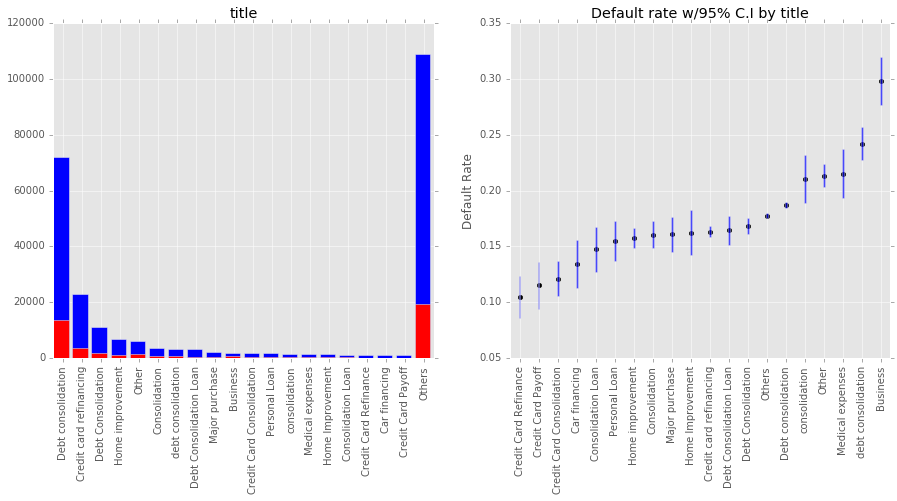

In [992]:
explore_column(lc_data, 'title')

* **title** seems to be related to `purpose` -- we will include one or the other of them, but there's no point in both.

---------------------------
zip_code: dtype=object, 0 nulls, count vals=885
Total number of distinct values: 885
         Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
100xx     2507    2153.0     354.0  0.006955   14.120463  0.127573  0.154836   
606xx     2448    2096.0     352.0  0.007092   14.379085  0.129891  0.157691   
770xx     1962    1665.0     297.0  0.008092   15.137615  0.135517  0.167236   
945xx     3286    2784.0     502.0  0.006276   15.276932  0.140468  0.165070   
750xx     2767    2333.0     434.0  0.006913   15.684857  0.143298  0.170399   
300xx     2275    1917.0     358.0  0.007634   15.736264  0.142399  0.172326   
852xx     1616    1348.0     268.0  0.009252   16.584158  0.147707  0.183976   
900xx     2474    2054.0     420.0  0.007548   16.976556  0.154972  0.184559   
926xx     1873    1550.0     323.0  0.008729   17.245061  0.155342  0.189559   
913xx     1672    1383.0     289.0  0.009247   17.284689  0.154723  0.190971   
921xx  

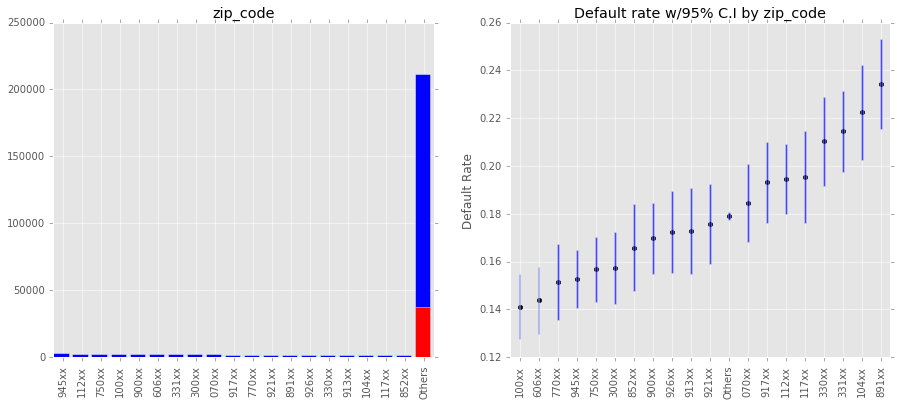

In [993]:
explore_column(lc_data, 'zip_code')

* **zip_code** will also need to be dealt with separately, but certainly should have some predictive value.

---------------------------
addr_state: dtype=object, 0 nulls, count vals=51
Total number of distinct values: 51
        Total     Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
CO       5607   4825.0     782.0  0.004627   13.946852  0.130401  0.148537   
TX      19341  16306.0    3035.0  0.002615   15.692053  0.151794  0.162047   
MA       6111   5095.0    1016.0  0.004763   16.625757  0.156923  0.175592   
IL       9251   7709.0    1542.0  0.003875   16.668468  0.159090  0.174279   
WA       5903   4918.0     985.0  0.004853   16.686431  0.157353  0.176376   
GA       8004   6647.0    1357.0  0.004194   16.954023  0.161320  0.177761   
CA      43105  35775.0    7330.0  0.001809   17.004988  0.166503  0.173596   
AZ       6073   5024.0    1049.0  0.004851   17.273176  0.163224  0.182239   
MN       4460   3657.0     803.0  0.005753   18.004484  0.168768  0.191321   
VA       7926   6490.0    1436.0  0.004326   18.117588  0.172696  0.189655   
Others  49553  40509.0    904

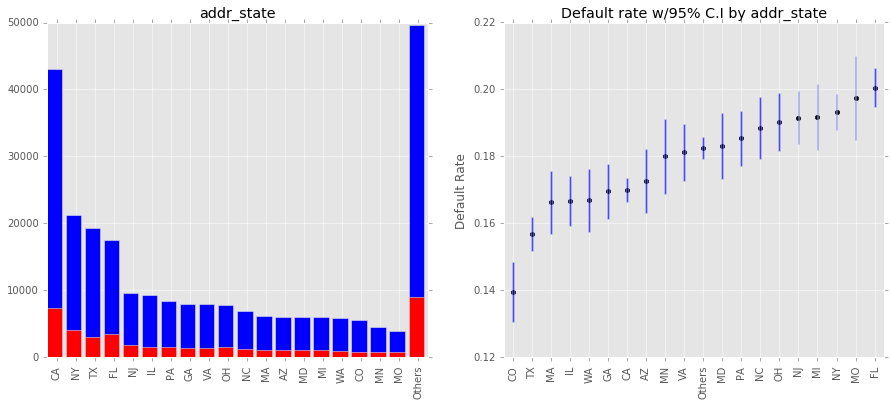

In [994]:
explore_column(lc_data, 'addr_state')

* **addr_state** is going into the model.

---------------------------
dti: dtype=float64, 0 nulls, count vals=3978
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        2.54       10.43       15.76       21.49       32.02       57.14
BAD        0.00        3.50       12.58       18.35       24.10       33.64       39.98


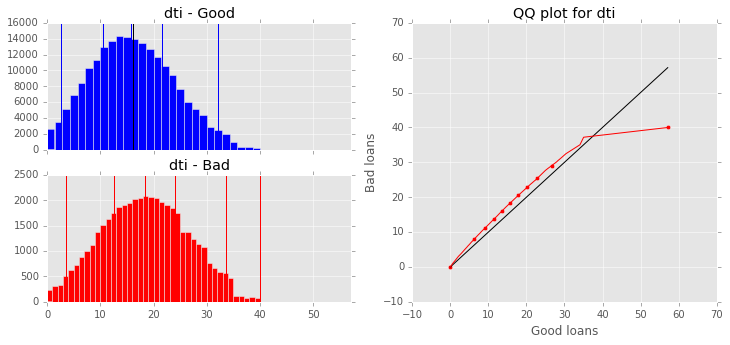

In [995]:
explore_column(lc_data, 'dti')

---------------------------
dti: dtype=float64, 0 nulls, count vals=3977
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        2.54       10.43       15.76       21.49       32.02       39.99
BAD        0.00        3.50       12.58       18.35       24.10       33.64       39.98


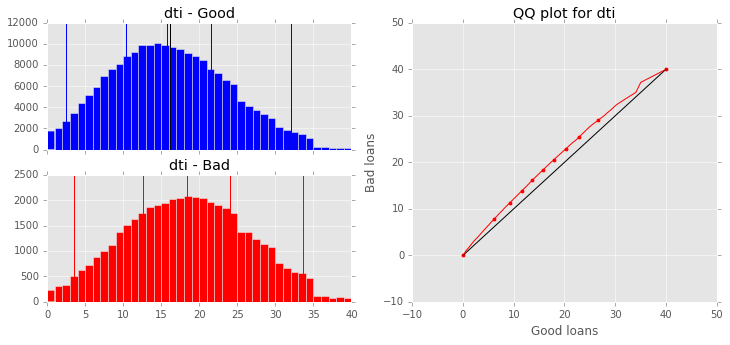

In [17]:
lc_data_trimmed = lc_data[['loan_status', 'dti']][lc_data.dti < 50]
explore_column(lc_data_trimmed, 'dti')

* **dti** The "debt-to-income" ratio. The difference between the two distributions is striking. We will certainly want to include this.

---------------------------
delinq_2yrs: dtype=float64, 0 nulls, count vals=22
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        0.00        2.00       29.00
BAD        0.00        0.00        0.00        0.00        0.00        2.00       18.00


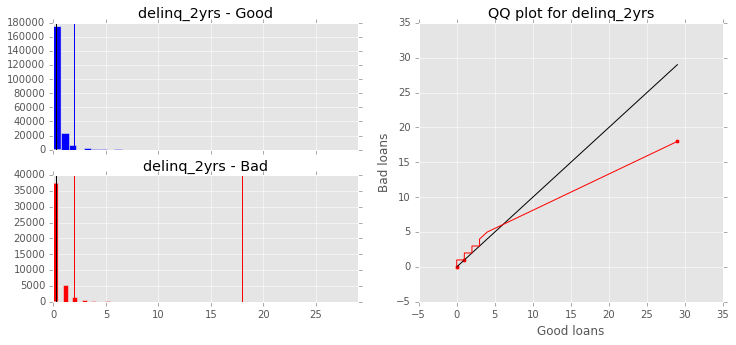

In [20]:
lc_data_trimmed = lc_data[['loan_status', 'delinq_2yrs']][lc_data.delinq_2yrs < 10]
explore_column(lc_data, 'delinq_2yrs')

* **delinq_2yrs** This may want to be converted to a categorical factor: 0, 1, >1

---------------------------
earliest_cr_line: dtype=object, 0 nulls, count vals=644
Total number of distinct values: 644
          Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
1999-10    1964    1672.0     292.0  0.008028   14.867617  0.132942  0.164411   
2001-09    1723    1450.0     273.0  0.008797   15.844457  0.141202  0.175687   
1998-11    1633    1373.0     260.0  0.009054   15.921617  0.141470  0.176962   
2001-10    1955    1637.0     318.0  0.008347   16.265985  0.146300  0.179019   
2000-09    1759    1468.0     291.0  0.008860   16.543491  0.148070  0.182800   
2002-10    1714    1427.0     287.0  0.009019   16.744457  0.149768  0.185121   
1999-11    1890    1566.0     324.0  0.008669   17.142857  0.154437  0.188420   
2002-09    1637    1355.0     282.0  0.009333   17.226634  0.153974  0.190559   
2001-08    1795    1485.0     310.0  0.008922   17.270195  0.155215  0.190188   
2000-10    2111    1746.0     365.0  0.008231   17.290384  0.156772  

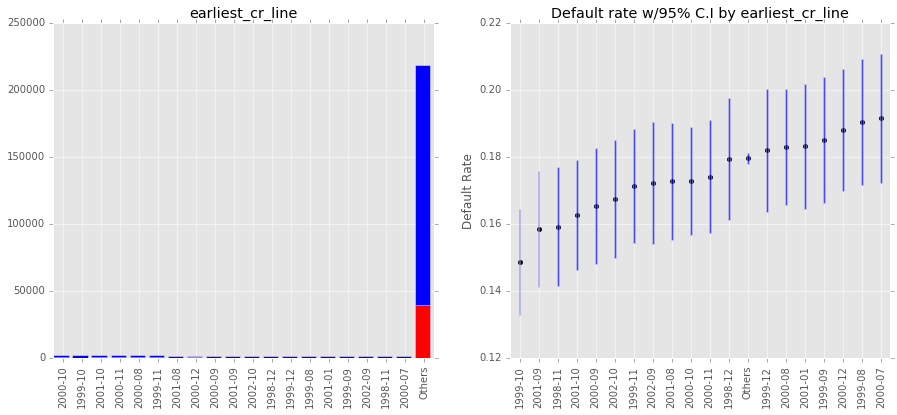

In [998]:
explore_column(lc_data, 'earliest_cr_line')

* **earliest_cr_line**

---------------------------
inq_last_6mths: dtype=float64, 0 nulls, count vals=9
Total number of distinct values: 9
      Total    Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  Label
0.0  123648  104019     19629  0.001039   15.874903  0.156712  0.160786    0.0
1.0   72672   59156     13516  0.001443   18.598635  0.183157  0.188815    1.0
2.0   34729   27583      7146  0.002169   20.576463  0.201513  0.210016    2.0
5.0    1371    1074       297  0.011126   21.663020  0.194824  0.238436    5.0
4.0    3690    2876       814  0.006826   22.059621  0.207217  0.233975    4.0
8.0      18      14         4  0.097991   22.222222  0.030160  0.414284    8.0
3.0   16029   12381      3648  0.003312   22.758750  0.221097  0.234078    3.0
7.0      46      34        12  0.064743   26.086957  0.133973  0.387766    7.0
6.0     517     380       137  0.019410   26.499033  0.226948  0.303033    6.0


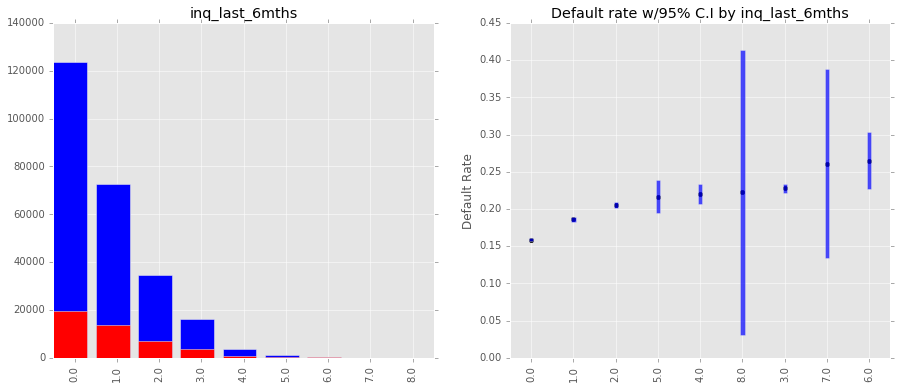

In [999]:
explore_column(lc_data, 'inq_last_6mths')

* **inq_last_6mths**

---------------------------
mths_since_last_delinq: dtype=float64, 140814 nulls, count vals=127
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        3.00       17.00       33.00       51.00       78.00      151.00
BAD        0.00        3.00       15.00       31.00       50.00       78.00      152.00


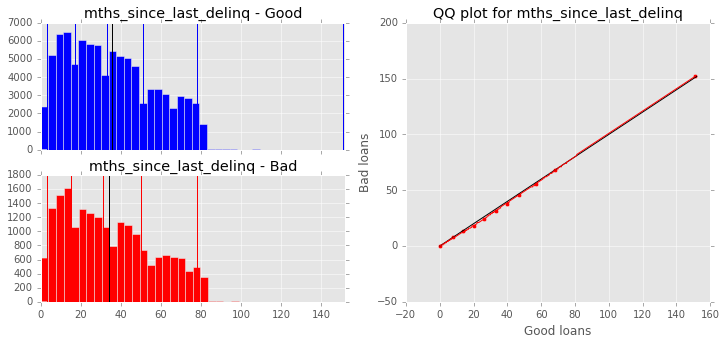

In [1000]:
explore_column(lc_data, 'mths_since_last_delinq')

* **mths_since_last_delinq**

---------------------------
mths_since_last_record: dtype=float64, 221366 nulls, count vals=123
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00       13.00       55.00       77.00      101.00      117.00      121.00
BAD        0.00       12.00       59.00       86.00      103.00      117.00      129.00


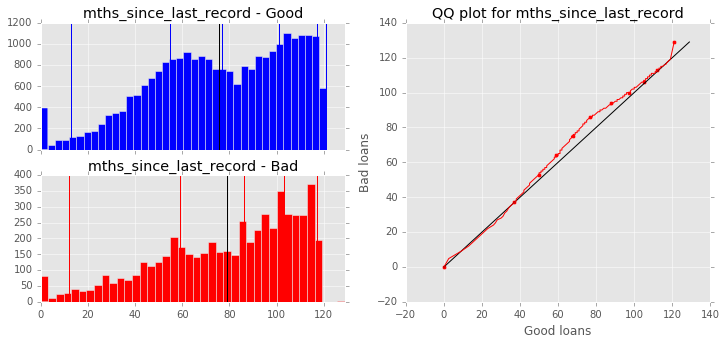

In [1001]:
explore_column(lc_data, 'mths_since_last_record')

* **mths_since_last_record**

---------------------------
open_acc: dtype=float64, 0 nulls, count vals=59
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        4.00        7.00       10.00       14.00       23.00       58.00
BAD        0.00        4.00        8.00       10.00       14.00       23.00       76.00


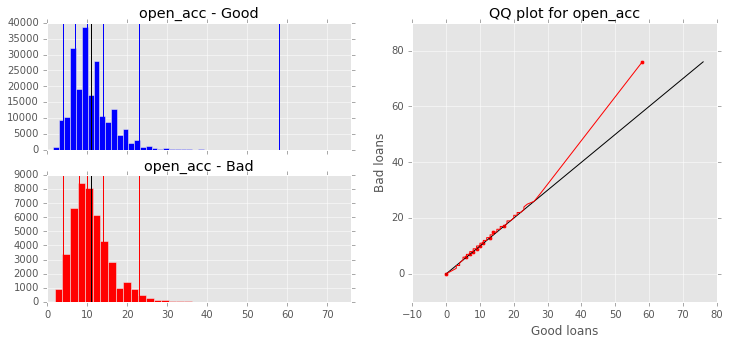

In [1002]:
explore_column(lc_data, 'open_acc')

* **open_acc**

---------------------------
pub_rec: dtype=float64, 0 nulls, count vals=14
Total number of distinct values: 14
       Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
8.0        8       8.0       0.0  0.000000    0.000000  0.000000  0.000000   
10.0       5       5.0       0.0  0.000000    0.000000  0.000000  0.000000   
15.0       1       1.0       0.0  0.000000    0.000000  0.000000  0.000000   
11.0       1       1.0       0.0  0.000000    0.000000  0.000000  0.000000   
3.0      676     563.0     113.0  0.014351   16.715976  0.139032  0.195287   
1.0    27321   22487.0    4834.0  0.002309   17.693349  0.172408  0.181459   
0.0   221804  182117.0   39687.0  0.000814   17.892824  0.177333  0.180523   
2.0     2546    2063.0     483.0  0.007770   18.970935  0.174480  0.204939   
4.0      202     158.0      44.0  0.029042   21.782178  0.160899  0.274744   
6.0       39      30.0       9.0  0.067466   23.076923  0.098536  0.363003   
7.0       19      14.0       5.

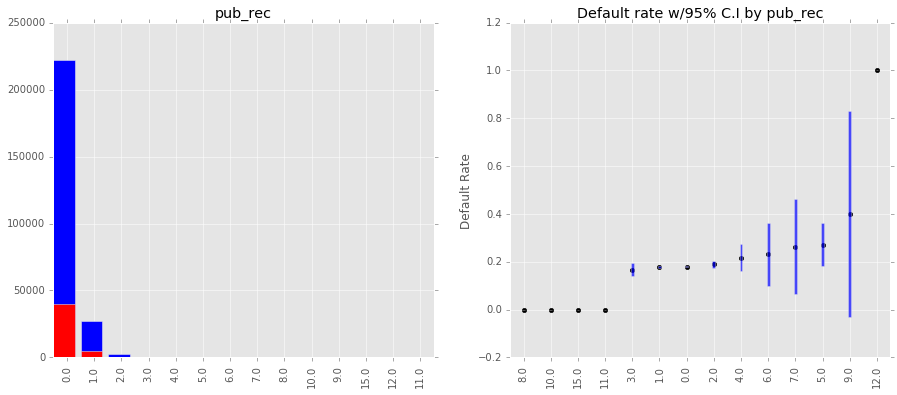

In [1003]:
explore_column(lc_data, 'pub_rec')

* **pub_rec**

---------------------------
revol_bal: dtype=float64, 0 nulls, count vals=47291
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00      602.00     5789.00    10850.00    19043.00    52216.30  1743266.00
BAD        0.00      777.00     6232.50    11356.00    19203.50    47504.40  1746716.00


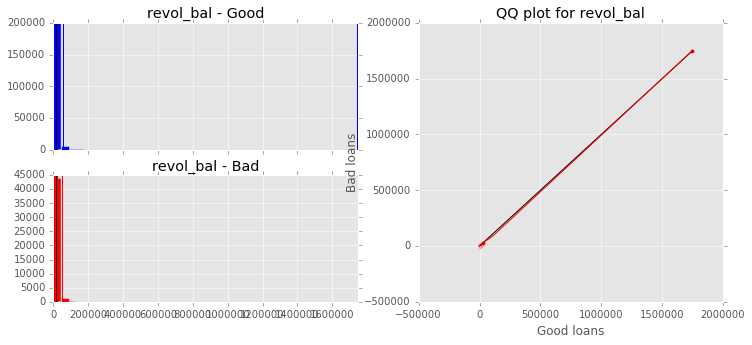

In [1004]:
explore_column(lc_data, 'revol_bal')

* **revol_bal**

---------------------------
revol_util: dtype=float64, 199 nulls, count vals=1199
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        4.10       34.90       54.50       72.80       95.10      892.30
BAD        0.00        8.50       43.30       61.70       78.00       96.50      129.40


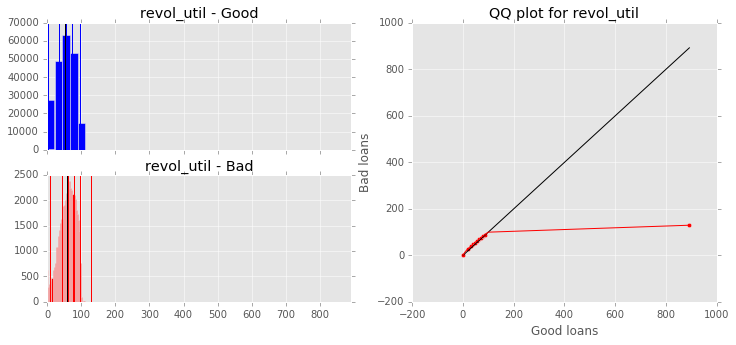

In [1005]:
explore_column(lc_data, 'revol_util')

* **revol_util**

---------------------------
total_acc: dtype=float64, 0 nulls, count vals=105
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       2.00        7.00       17.00       24.00       32.00       53.00      150.00
BAD        2.00        7.00       16.00       23.00       31.00       51.00      110.00


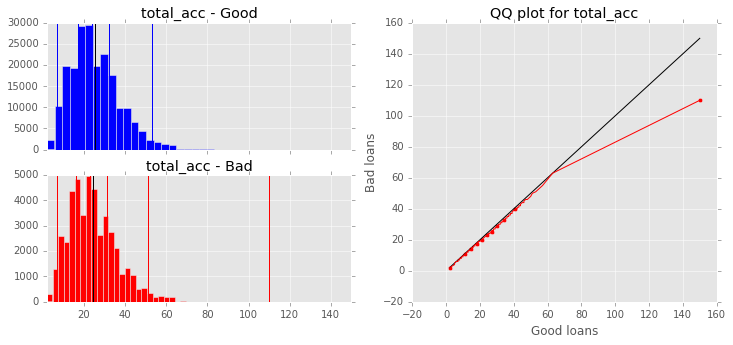

In [1006]:
explore_column(lc_data, 'total_acc')

* **total_acc**

---------------------------
initial_list_status: dtype=object, 0 nulls, count vals=2
Total number of distinct values: 2
    Total    Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf Label
w   70892   58577     12315  0.001423   17.371495  0.170926  0.176504     w
f  181828  148940     32888  0.000903   18.087423  0.179105  0.182643     f


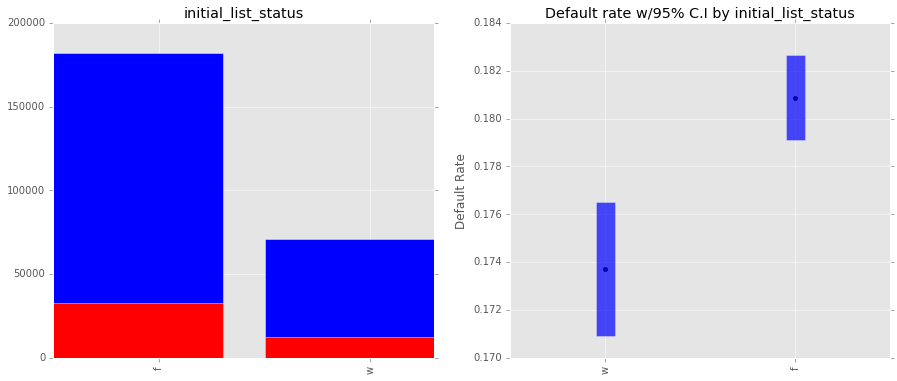

In [1007]:
explore_column(lc_data, 'initial_list_status')

* **initial_list_status**

---------------------------
out_prncp: dtype=float64, 0 nulls, count vals=1
Total number of distinct values: 1
      Total    Good  Defaults    StdErr  % Defaults   Lo Conf  Hi Conf  Label
0.0  252720  207517     45203  0.000762   17.886594  0.177372  0.18036    0.0


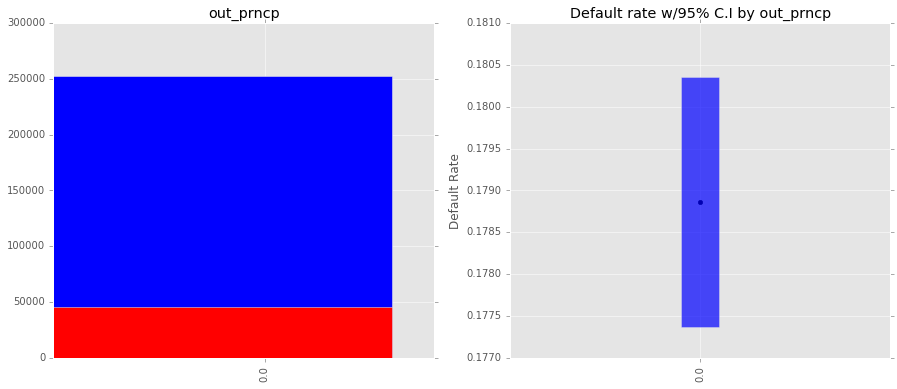

In [1008]:
explore_column(lc_data, 'out_prncp')

* **out_prncp**

---------------------------
out_prncp_inv: dtype=float64, 0 nulls, count vals=1
Total number of distinct values: 1
      Total    Good  Defaults    StdErr  % Defaults   Lo Conf  Hi Conf  Label
0.0  252720  207517     45203  0.000762   17.886594  0.177372  0.18036    0.0


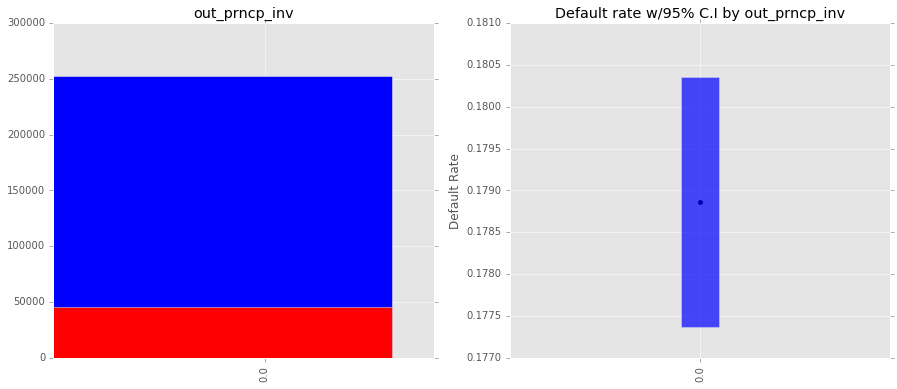

In [1009]:
explore_column(lc_data, 'out_prncp_inv')

* **out_prncp_inv**

---------------------------
total_pymnt: dtype=float64, 0 nulls, count vals=242158
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     2490.59     8063.99    12969.08    20545.26    38877.50    57777.58
BAD        0.00      458.87     2504.18     4873.50     8624.45    20766.86    46199.44


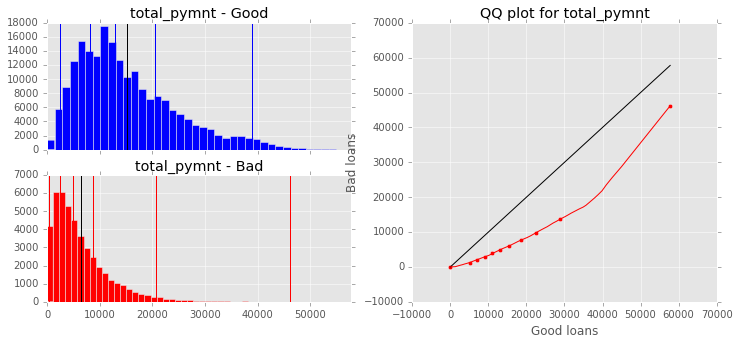

In [1010]:
explore_column(lc_data, 'total_pymnt')

* **total_pymnt**

---------------------------
total_pymnt_inv: dtype=float64, 0 nulls, count vals=235329
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     2373.07     7951.63    12877.70    20440.67    38796.61    57777.58
BAD        0.00      424.64     2465.30     4818.72     8549.13    20653.55    46162.55


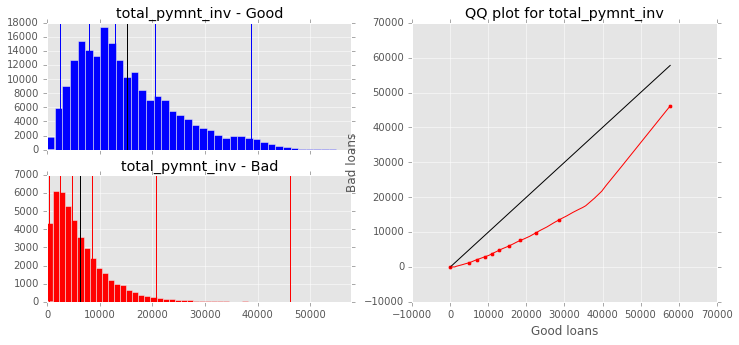

In [1011]:
explore_column(lc_data, 'total_pymnt_inv')

* **total_pymnt_inv**

---------------------------
total_rec_prncp: dtype=float64, 0 nulls, count vals=44900
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     2200.00     7100.00    11999.99    18000.00    35000.00    35000.03
BAD        0.00      143.98     1103.17     2319.07     4446.91    12154.57    34483.27


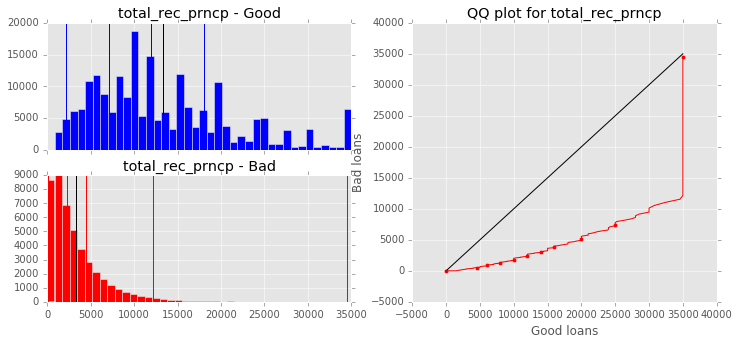

In [1012]:
explore_column(lc_data, 'total_rec_prncp')

* **total_rec_prncp**

---------------------------
total_rec_int: dtype=float64, 0 nulls, count vals=182757
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00       76.75      619.48     1285.42     2429.36     7659.42    22777.58
BAD        0.00       92.19      684.10     1430.66     2771.61     8455.29    20610.17


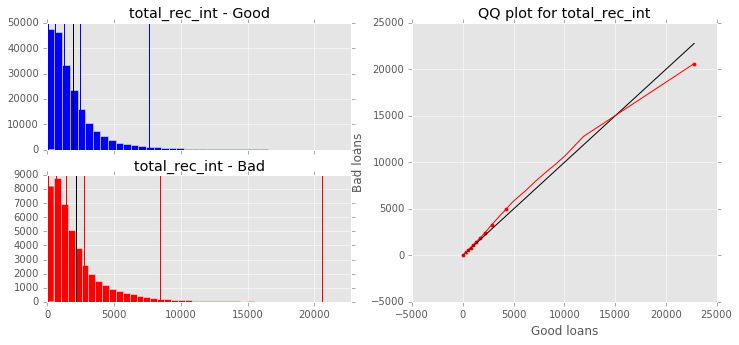

In [1013]:
explore_column(lc_data, 'total_rec_int')

* **total_rec_int**

---------------------------
total_rec_late_fee: dtype=float64, 0 nulls, count vals=4427
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        0.00        0.00      286.75
BAD        0.00        0.00        0.00        0.00        0.00       30.92      358.68


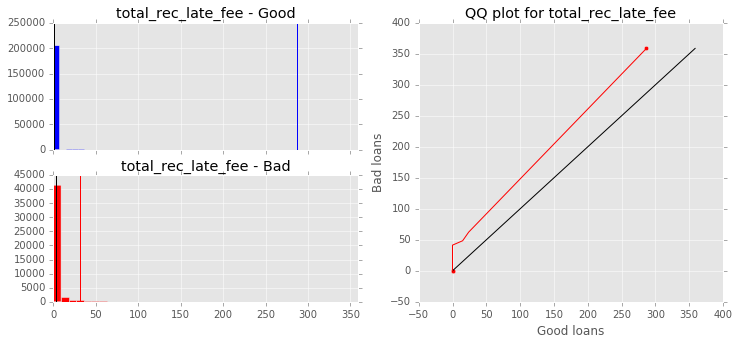

In [1014]:
explore_column(lc_data, 'total_rec_late_fee')

* **total_rec_late_fee**

---------------------------
recoveries: dtype=float64, 0 nulls, count vals=22596
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        0.00        0.00        0.00
BAD        0.00        0.00        0.00       34.21     1260.07     4800.20    33520.27


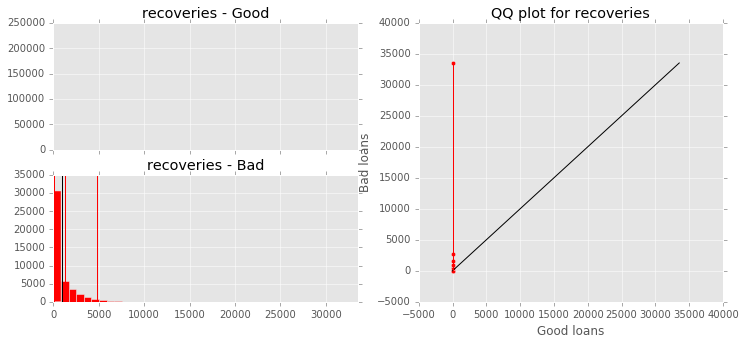

In [1015]:
explore_column(lc_data, 'recoveries')

* **recoveries**

---------------------------
collection_recovery_fee: dtype=float64, 0 nulls, count vals=20517
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        0.00        0.00        0.00
BAD        0.00        0.00        0.00        1.07       26.68      809.49     7002.19


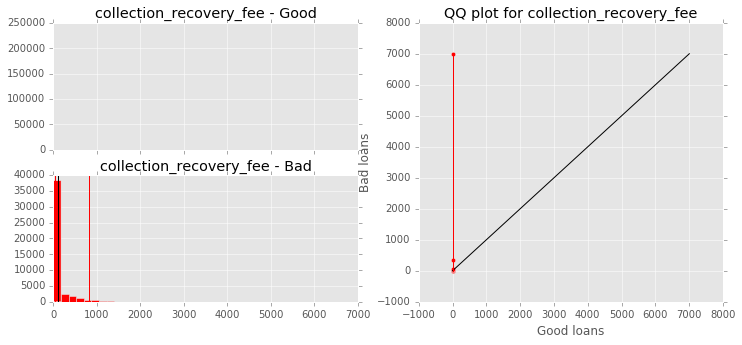

In [1016]:
explore_column(lc_data, 'collection_recovery_fee')

* **collection_recovery_fee**

---------------------------
last_pymnt_d: dtype=object, 527 nulls, count vals=95
Total number of distinct values: 95
         Total     Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
2015-12  12159  12044.0     115.0  0.000878    0.945801  0.007738  0.011178   
2015-11  10692  10570.0     122.0  0.001027    1.141040  0.009397  0.013424   
2015-10  12503  12182.0     321.0  0.001414    2.567384  0.022901  0.028446   
2015-09  11245  10595.0     650.0  0.002201    5.780347  0.053490  0.062117   
2015-08  12011  10063.0    1948.0  0.003363   16.218466  0.155592  0.168777   
2015-02   8848   7202.0    1646.0  0.004137   18.603074  0.177922  0.194139   
2015-01   8653   6965.0    1688.0  0.004260   19.507685  0.186727  0.203426   
2015-04  11102   8907.0    2195.0  0.003780   19.771212  0.190304  0.205121   
2015-03  10755   8613.0    2142.0  0.003851   19.916318  0.191615  0.206711   
2015-05  11064   8699.0    2365.0  0.003897   21.375633  0.206117  0.221395   
Others   71045

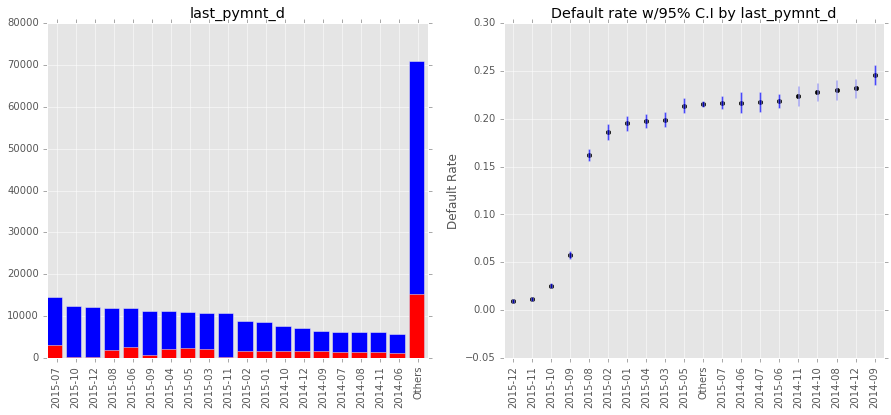

In [1017]:
explore_column(lc_data, 'last_pymnt_d')

* **last_pymnt_d**

---------------------------
last_pymnt_amnt: dtype=float64, 0 nulls, count vals=199140
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.01       64.11     1563.99     5756.49    11671.19    27575.45    36475.59
BAD        0.00       30.22      236.06      375.04      568.55     1178.64    34833.35


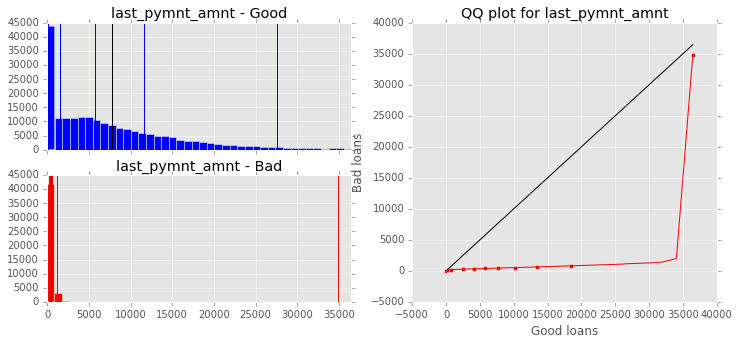

In [1018]:
explore_column(lc_data, 'last_pymnt_amnt')

* **last_pymnt_amnt**

---------------------------
next_pymnt_d: dtype=float64, 252720 nulls, count vals=0
Total number of distinct values: 0
Empty DataFrame
Columns: [Total, Good, Defaults, StdErr, % Defaults, Lo Conf, Hi Conf, Label]
Index: []


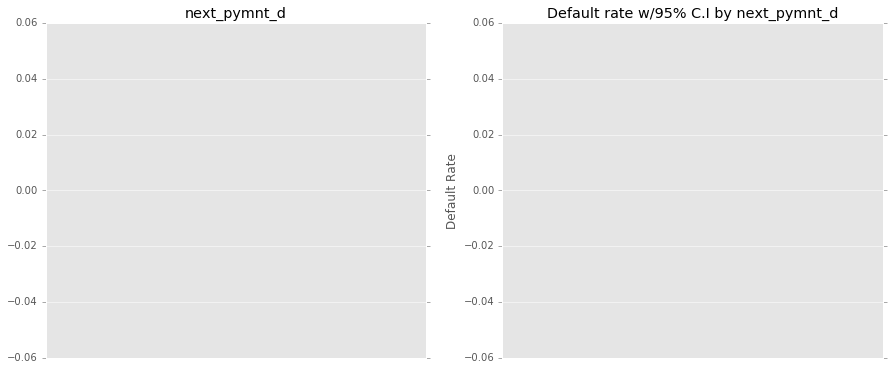

In [1019]:
explore_column(lc_data, 'next_pymnt_d')

* **next_pymnt_d**

---------------------------
last_credit_pull_d: dtype=object, 20 nulls, count vals=96
Total number of distinct values: 96
          Total     Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
2015-11   10931  10868.0      63.0  0.000724    0.576343  0.004344  0.007183   
2015-10    9934   9864.0      70.0  0.000839    0.704651  0.005402  0.008691   
2015-09    9696   8647.0    1049.0  0.003155   10.818894  0.102006  0.114372   
2015-07    8332   7181.0    1151.0  0.003780   13.814210  0.130733  0.145551   
2015-08    7727   6638.0    1089.0  0.003958   14.093439  0.133176  0.148693   
2015-06    6910   5887.0    1023.0  0.004272   14.804631  0.139672  0.156420   
2015-05    5761   4866.0     895.0  0.004773   15.535497  0.146001  0.164709   
2015-04    5998   5054.0     944.0  0.004702   15.738580  0.148170  0.166602   
2016-01  102013  82148.0   19865.0  0.001240   19.473008  0.192300  0.197160   
2015-12   18488  14776.0    3712.0  0.002946   20.077888  0.195005  0.206553  

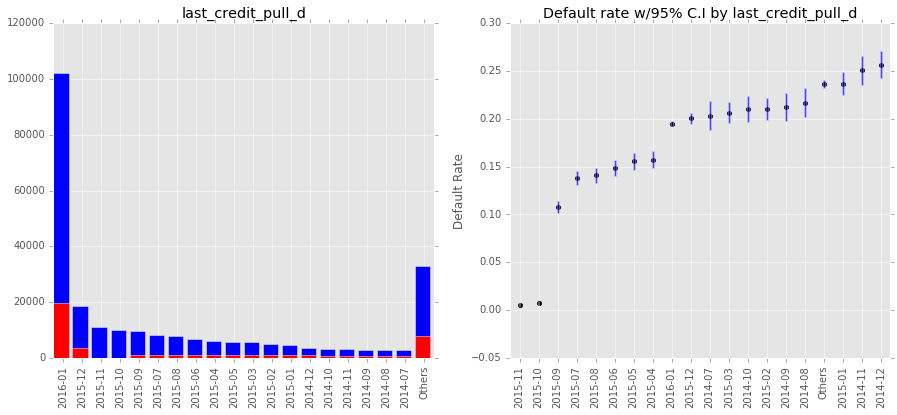

In [1020]:
explore_column(lc_data, 'last_credit_pull_d')

* **last_credit_pull_d**

---------------------------
collections_12_mths_ex_med: dtype=float64, 0 nulls, count vals=7
Total number of distinct values: 7
      Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
3.0       8       8.0       0.0  0.000000    0.000000  0.000000  0.000000   
6.0       1       1.0       0.0  0.000000    0.000000  0.000000  0.000000   
5.0       1       1.0       0.0  0.000000    0.000000  0.000000  0.000000   
2.0      96      79.0      17.0  0.038961   17.708333  0.100720  0.253447   
0.0  251146  206288.0   44858.0  0.000764   17.861324  0.177115  0.180111   
1.0    1466    1139.0     327.0  0.010873   22.305593  0.201746  0.244366   
4.0       2       1.0       1.0  0.353553   50.000000 -0.192965  1.192965   

     Label  
3.0    3.0  
6.0    6.0  
5.0    5.0  
2.0    2.0  
0.0    0.0  
1.0    1.0  
4.0    4.0  


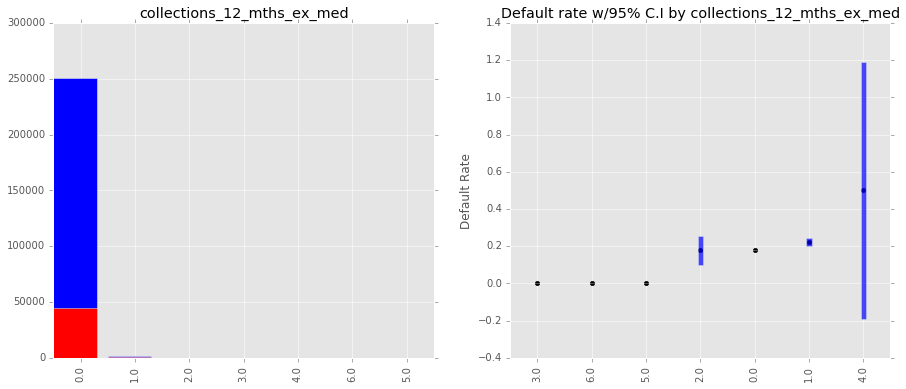

In [1021]:
explore_column(lc_data, 'collections_12_mths_ex_med')

* **collections_12_mths_ex_med**

---------------------------
mths_since_last_major_derog: dtype=float64, 205175 nulls, count vals=149
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        7.00       27.00       43.00       60.00       80.00      159.00
BAD        0.00        6.00       25.00       42.00       60.00       80.00      152.00


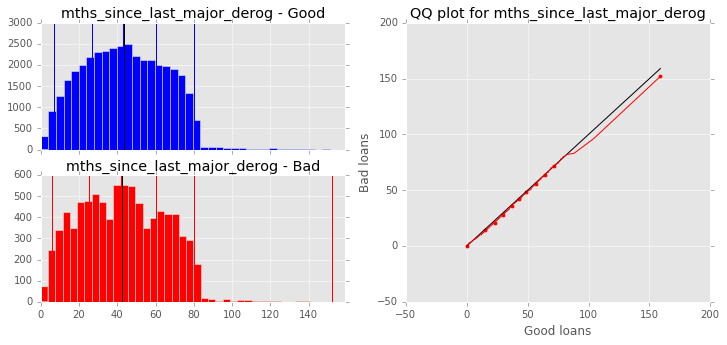

In [1022]:
explore_column(lc_data, 'mths_since_last_major_derog')

* **mths_since_last_major_derog**

---------------------------
policy_code: dtype=float64, 0 nulls, count vals=1
Total number of distinct values: 1
      Total    Good  Defaults    StdErr  % Defaults   Lo Conf  Hi Conf  Label
1.0  252720  207517     45203  0.000762   17.886594  0.177372  0.18036    1.0


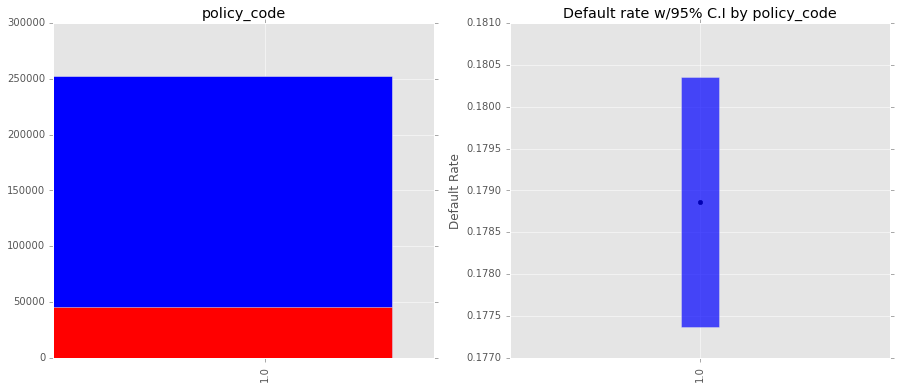

In [1023]:
explore_column(lc_data, 'policy_code')

* **policy_code**

---------------------------
application_type: dtype=object, 0 nulls, count vals=2
Total number of distinct values: 2
             Total      Good  Defaults    StdErr  % Defaults   Lo Conf  \
JOINT            1       1.0       0.0  0.000000    0.000000  0.000000   
INDIVIDUAL  252719  207516.0   45203.0  0.000762   17.886665  0.177372   

             Hi Conf       Label  
JOINT       0.000000       JOINT  
INDIVIDUAL  0.180361  INDIVIDUAL  


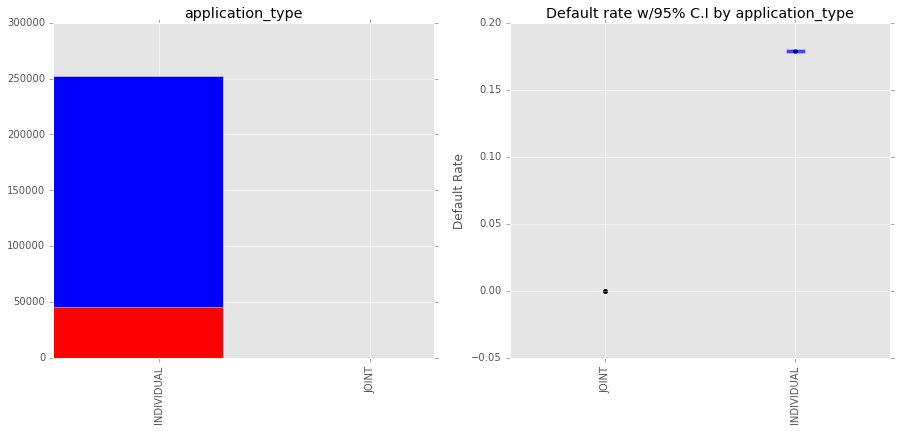

In [1024]:
explore_column(lc_data, 'application_type')

* **application_type**

---------------------------
annual_inc_joint: dtype=float64, 252719 nulls, count vals=1
Total number of distinct values: 1
         Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf    Label
36000.0      1   1.0       0.0     0.0         0.0      0.0      0.0  36000.0


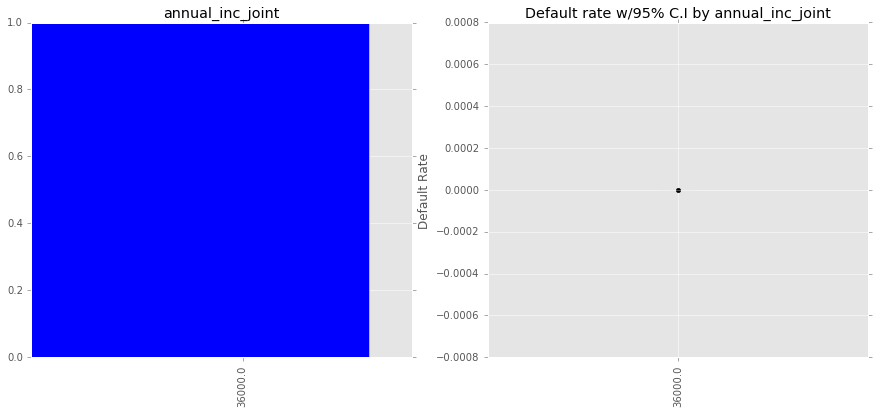

In [1025]:
explore_column(lc_data, 'annual_inc_joint')

* **annual_inc_joint**

---------------------------
dti_joint: dtype=float64, 252719 nulls, count vals=1
Total number of distinct values: 1
      Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
17.6      1   1.0       0.0     0.0         0.0      0.0      0.0   17.6


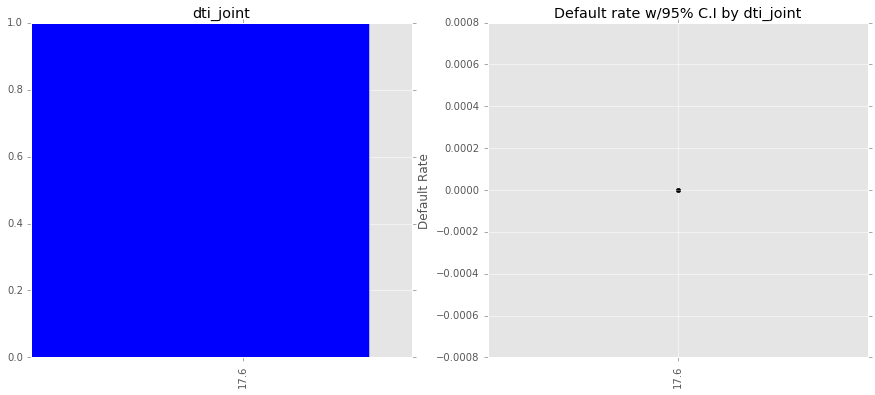

In [1026]:
explore_column(lc_data, 'dti_joint')

* **dti_joint**

---------------------------
verification_status_joint: dtype=object, 252719 nulls, count vals=1
Total number of distinct values: 1
                 Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  \
Source Verified      1   1.0       0.0     0.0         0.0      0.0      0.0   

                           Label  
Source Verified  Source Verified  


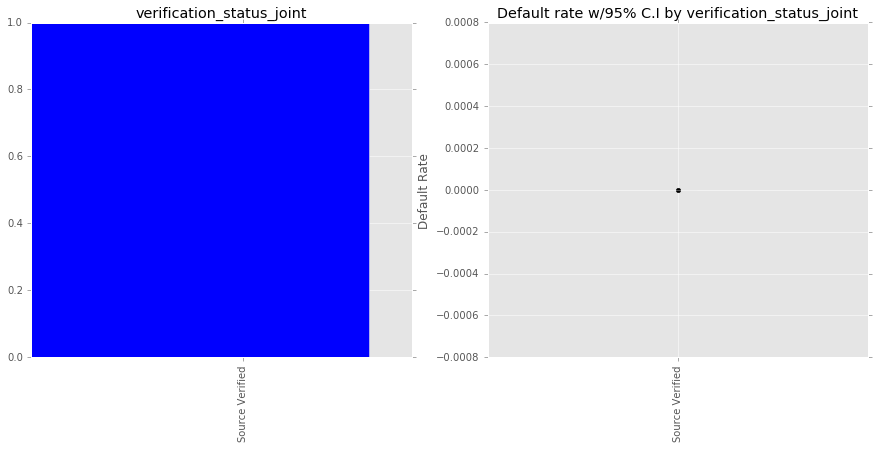

In [1027]:
explore_column(lc_data, 'verification_status_joint')

* **verification_status_joint**

---------------------------
acc_now_delinq: dtype=float64, 0 nulls, count vals=6
Total number of distinct values: 6
      Total      Good  Defaults    StdErr  % Defaults   Lo Conf   Hi Conf  \
4.0       1       1.0       0.0  0.000000    0.000000  0.000000  0.000000   
0.0  251985  206942.0   45043.0  0.000763   17.875270  0.177257  0.180249   
1.0     693     545.0     148.0  0.015568   21.356421  0.183051  0.244077   
2.0      36      27.0       9.0  0.072169   25.000000  0.108549  0.391451   
5.0       2       1.0       1.0  0.353553   50.000000 -0.192965  1.192965   
3.0       3       1.0       2.0  0.272166   66.666667  0.133222  1.200111   

     Label  
4.0    4.0  
0.0    0.0  
1.0    1.0  
2.0    2.0  
5.0    5.0  
3.0    3.0  


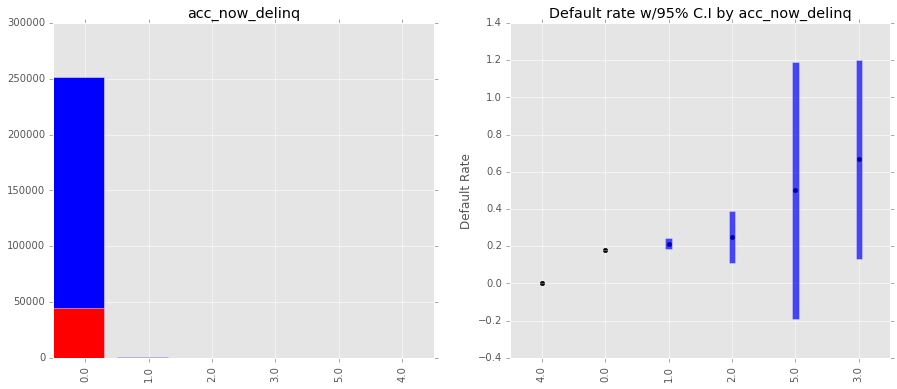

In [1028]:
explore_column(lc_data, 'acc_now_delinq')

* **acc_now_delinq**

---------------------------
tot_coll_amt: dtype=float64, 63457 nulls, count vals=4029
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        0.00     1061.00  9152545.00
BAD        0.00        0.00        0.00        0.00        0.00      972.00    95806.00


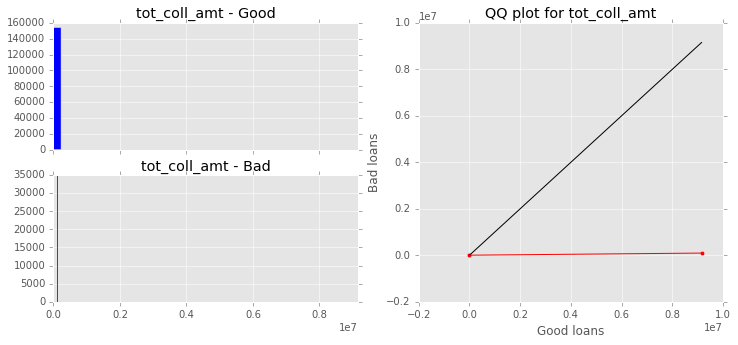

In [1029]:
explore_column(lc_data, 'tot_coll_amt')

* **tot_coll_amt**

---------------------------
tot_cur_bal: dtype=float64, 63457 nulls, count vals=134747
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     5508.48    29146.25    87779.00   216689.75   524726.75  8000078.00
BAD        0.00     5878.70    25670.00    59738.00   172573.00   434454.90  3437283.00


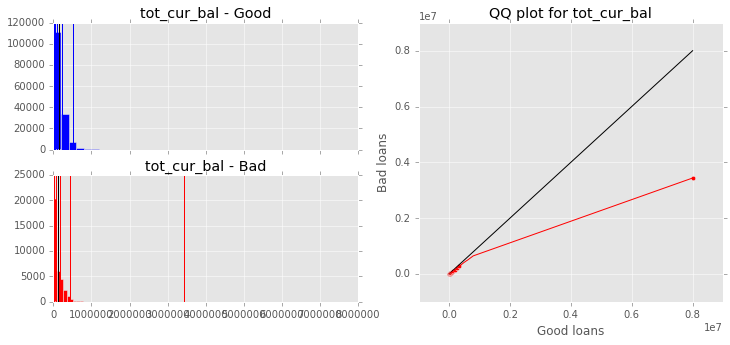

In [1030]:
explore_column(lc_data, 'tot_cur_bal')

* **tot_cur_bal**

---------------------------
open_acc_6m: dtype=float64, 252576 nulls, count vals=7
Total number of distinct values: 7
     Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
0.0     46  46.0       0.0     0.0         0.0      0.0      0.0    0.0
2.0     38  38.0       0.0     0.0         0.0      0.0      0.0    2.0
1.0     36  36.0       0.0     0.0         0.0      0.0      0.0    1.0
3.0     14  14.0       0.0     0.0         0.0      0.0      0.0    3.0
4.0      5   5.0       0.0     0.0         0.0      0.0      0.0    4.0
5.0      3   3.0       0.0     0.0         0.0      0.0      0.0    5.0
6.0      2   2.0       0.0     0.0         0.0      0.0      0.0    6.0


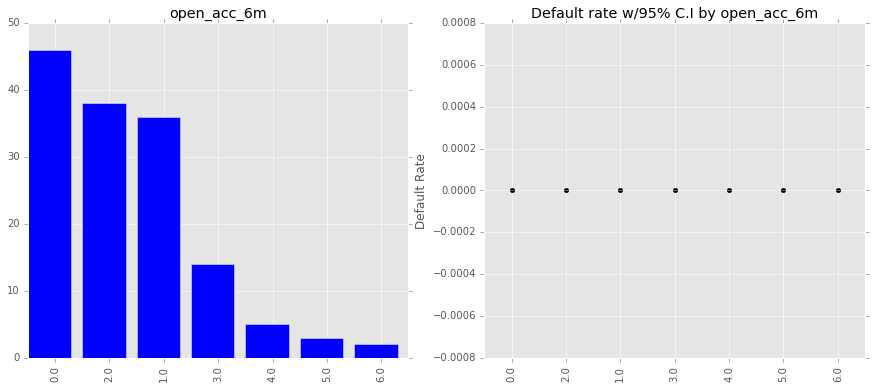

In [1031]:
explore_column(lc_data, 'open_acc_6m')

* **open_acc_6m**

---------------------------
open_il_6m: dtype=float64, 252576 nulls, count vals=16
Total number of distinct values: 16
      Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
1.0      35  35.0       0.0     0.0         0.0      0.0      0.0    1.0
2.0      28  28.0       0.0     0.0         0.0      0.0      0.0    2.0
3.0      23  23.0       0.0     0.0         0.0      0.0      0.0    3.0
0.0      17  17.0       0.0     0.0         0.0      0.0      0.0    0.0
4.0      14  14.0       0.0     0.0         0.0      0.0      0.0    4.0
5.0       8   8.0       0.0     0.0         0.0      0.0      0.0    5.0
11.0      3   3.0       0.0     0.0         0.0      0.0      0.0   11.0
9.0       3   3.0       0.0     0.0         0.0      0.0      0.0    9.0
6.0       3   3.0       0.0     0.0         0.0      0.0      0.0    6.0
10.0      2   2.0       0.0     0.0         0.0      0.0      0.0   10.0
8.0       2   2.0       0.0     0.0         0.0      0.0      0.0    8.0
7.0  

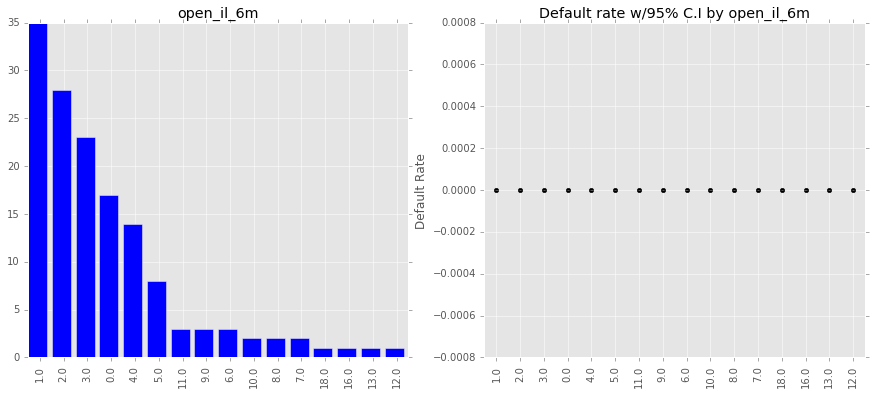

In [1032]:
explore_column(lc_data, 'open_il_6m')

* **open_il_6m**

---------------------------
open_il_12m: dtype=float64, 252576 nulls, count vals=7
Total number of distinct values: 7
     Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
0.0     74  74.0       0.0     0.0         0.0      0.0      0.0    0.0
1.0     39  39.0       0.0     0.0         0.0      0.0      0.0    1.0
2.0     15  15.0       0.0     0.0         0.0      0.0      0.0    2.0
3.0     10  10.0       0.0     0.0         0.0      0.0      0.0    3.0
4.0      3   3.0       0.0     0.0         0.0      0.0      0.0    4.0
5.0      2   2.0       0.0     0.0         0.0      0.0      0.0    5.0
6.0      1   1.0       0.0     0.0         0.0      0.0      0.0    6.0


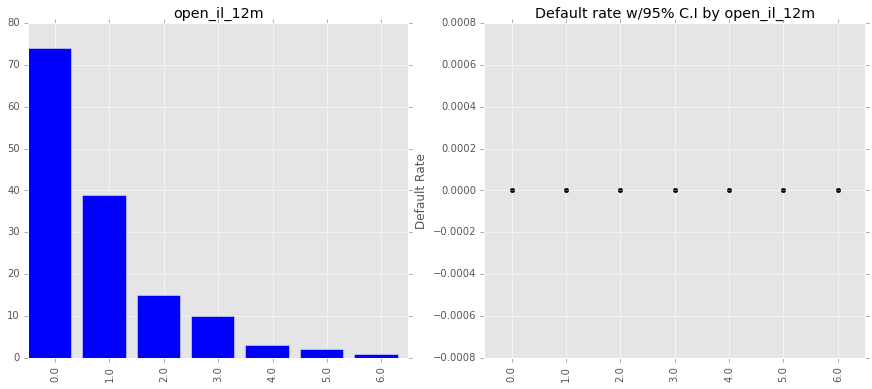

In [1033]:
explore_column(lc_data, 'open_il_12m')

* **open_il_12m**

---------------------------
open_il_24m: dtype=float64, 252576 nulls, count vals=10
Total number of distinct values: 10
      Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
1.0      42  42.0       0.0     0.0         0.0      0.0      0.0    1.0
0.0      35  35.0       0.0     0.0         0.0      0.0      0.0    0.0
2.0      27  27.0       0.0     0.0         0.0      0.0      0.0    2.0
3.0      21  21.0       0.0     0.0         0.0      0.0      0.0    3.0
4.0       9   9.0       0.0     0.0         0.0      0.0      0.0    4.0
7.0       4   4.0       0.0     0.0         0.0      0.0      0.0    7.0
5.0       3   3.0       0.0     0.0         0.0      0.0      0.0    5.0
14.0      1   1.0       0.0     0.0         0.0      0.0      0.0   14.0
11.0      1   1.0       0.0     0.0         0.0      0.0      0.0   11.0
6.0       1   1.0       0.0     0.0         0.0      0.0      0.0    6.0


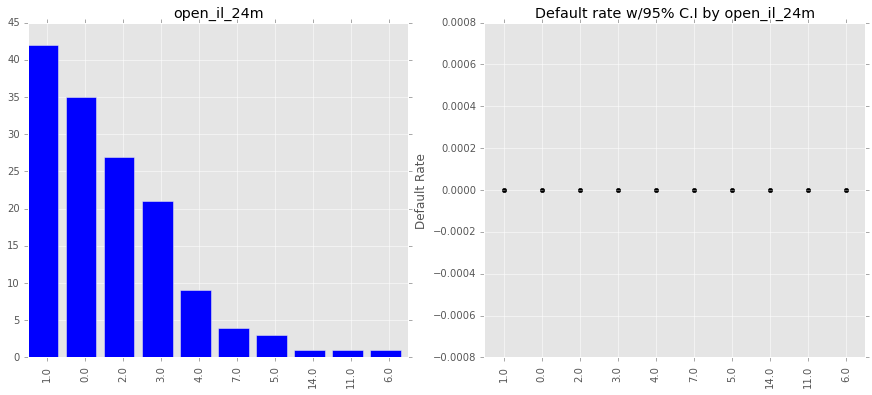

In [1034]:
explore_column(lc_data, 'open_il_24m')

* **open_il_24m**

---------------------------
mths_since_rcnt_il: dtype=float64, 252580 nulls, count vals=50
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        1.00        4.00       12.50       21.00      111.05      141.00
BAD         nan         nan         nan         nan         nan         nan         nan


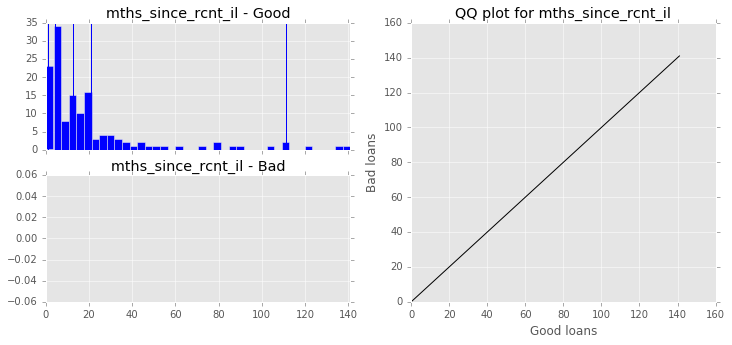

In [1035]:
explore_column(lc_data, 'mths_since_rcnt_il')

* **mths_since_rcnt_il**

---------------------------
total_bal_il: dtype=float64, 252576 nulls, count vals=128
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00    10763.75    23605.00    50835.75   125035.20   249212.00
BAD         nan         nan         nan         nan         nan         nan         nan


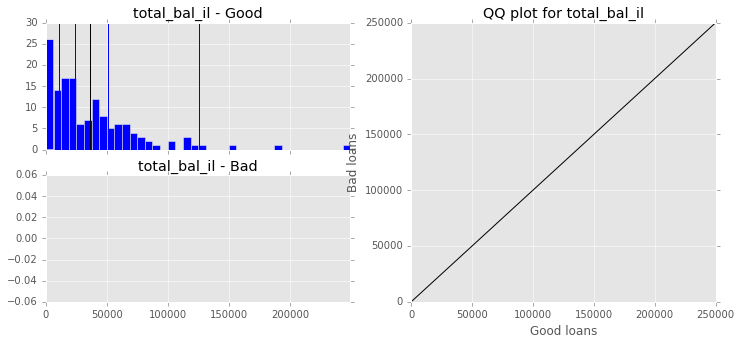

In [1036]:
explore_column(lc_data, 'total_bal_il')

* **total_bal_il**

---------------------------
il_util: dtype=float64, 252594 nulls, count vals=116
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00       23.31       63.35       77.05       88.25      110.81      129.20
BAD         nan         nan         nan         nan         nan         nan         nan


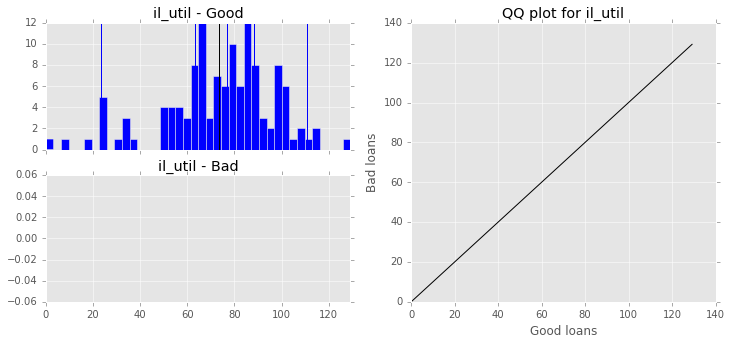

In [1037]:
explore_column(lc_data, 'il_util')

* **il_util**

---------------------------
open_rv_12m: dtype=float64, 252576 nulls, count vals=8
Total number of distinct values: 8
     Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
1.0     39  39.0       0.0     0.0         0.0      0.0      0.0    1.0
0.0     39  39.0       0.0     0.0         0.0      0.0      0.0    0.0
2.0     31  31.0       0.0     0.0         0.0      0.0      0.0    2.0
3.0     18  18.0       0.0     0.0         0.0      0.0      0.0    3.0
5.0      8   8.0       0.0     0.0         0.0      0.0      0.0    5.0
4.0      6   6.0       0.0     0.0         0.0      0.0      0.0    4.0
7.0      2   2.0       0.0     0.0         0.0      0.0      0.0    7.0
8.0      1   1.0       0.0     0.0         0.0      0.0      0.0    8.0


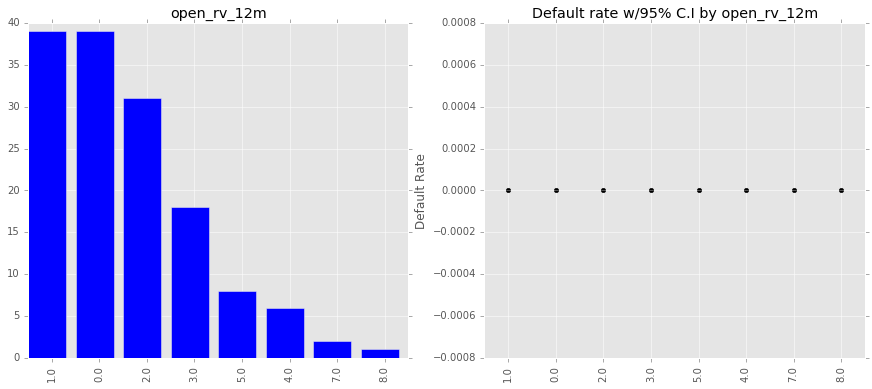

In [1038]:
explore_column(lc_data, 'open_rv_12m')

* **open_rv_12m**

---------------------------
open_rv_24m: dtype=float64, 252576 nulls, count vals=14
Total number of distinct values: 14
      Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
2.0      29  29.0       0.0     0.0         0.0      0.0      0.0    2.0
1.0      23  23.0       0.0     0.0         0.0      0.0      0.0    1.0
4.0      19  19.0       0.0     0.0         0.0      0.0      0.0    4.0
3.0      18  18.0       0.0     0.0         0.0      0.0      0.0    3.0
5.0      15  15.0       0.0     0.0         0.0      0.0      0.0    5.0
0.0      12  12.0       0.0     0.0         0.0      0.0      0.0    0.0
6.0       9   9.0       0.0     0.0         0.0      0.0      0.0    6.0
7.0       7   7.0       0.0     0.0         0.0      0.0      0.0    7.0
9.0       5   5.0       0.0     0.0         0.0      0.0      0.0    9.0
8.0       3   3.0       0.0     0.0         0.0      0.0      0.0    8.0
21.0      1   1.0       0.0     0.0         0.0      0.0      0.0   21.0
12.0

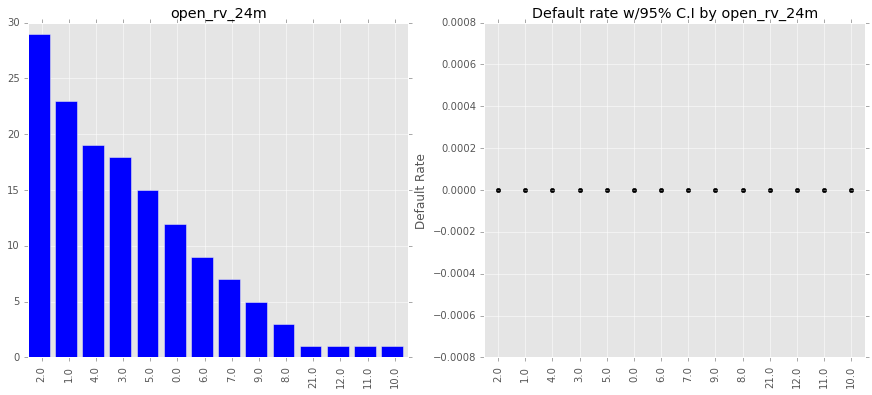

In [1039]:
explore_column(lc_data, 'open_rv_24m')

* **open_rv_24m**

---------------------------
max_bal_bc: dtype=float64, 252576 nulls, count vals=139
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00     2091.25     4511.50     8212.75    16085.07    22279.00
BAD         nan         nan         nan         nan         nan         nan         nan


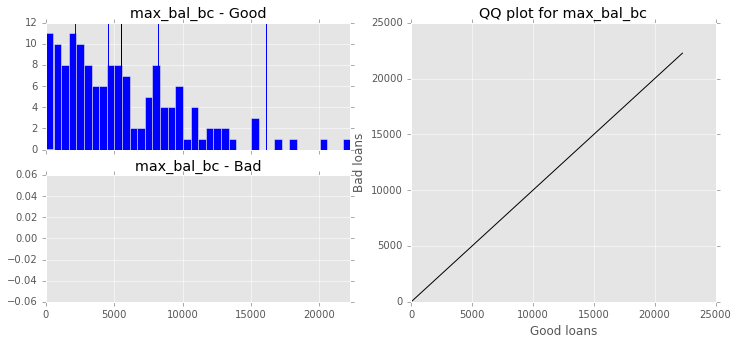

In [1040]:
explore_column(lc_data, 'max_bal_bc')

* **max_bal_bc**

---------------------------
all_util: dtype=float64, 252576 nulls, count vals=126
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       7.90       18.38       46.82       61.95       74.23       91.87      102.80
BAD         nan         nan         nan         nan         nan         nan         nan


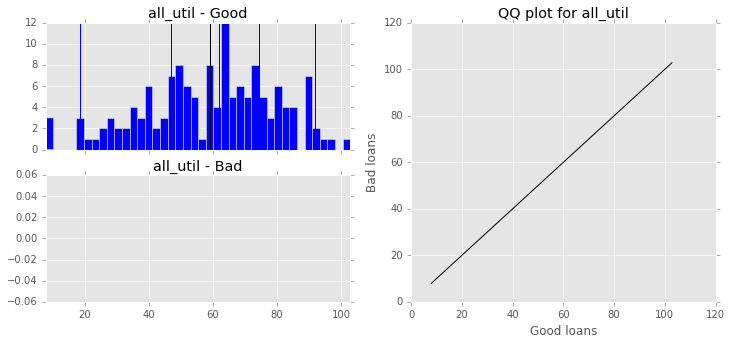

In [1041]:
explore_column(lc_data, 'all_util')

* **all_util**

---------------------------
total_rev_hi_lim: dtype=float64, 63457 nulls, count vals=9543
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00     4600.00    13500.00    22700.00    37800.00   101900.00  2013133.00
BAD        0.00     4000.00    12400.00    20500.00    33200.00    81330.00  1998700.00


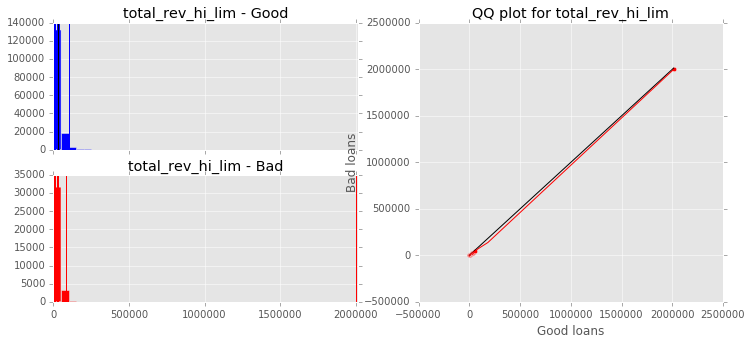

In [1042]:
explore_column(lc_data, 'total_rev_hi_lim')

* **total_rev_hi_lim**

---------------------------
inq_fi: dtype=float64, 252576 nulls, count vals=9
Total number of distinct values: 9
     Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
0.0     62  62.0       0.0     0.0         0.0      0.0      0.0    0.0
1.0     47  47.0       0.0     0.0         0.0      0.0      0.0    1.0
2.0     12  12.0       0.0     0.0         0.0      0.0      0.0    2.0
3.0      7   7.0       0.0     0.0         0.0      0.0      0.0    3.0
4.0      5   5.0       0.0     0.0         0.0      0.0      0.0    4.0
7.0      4   4.0       0.0     0.0         0.0      0.0      0.0    7.0
5.0      4   4.0       0.0     0.0         0.0      0.0      0.0    5.0
6.0      2   2.0       0.0     0.0         0.0      0.0      0.0    6.0
9.0      1   1.0       0.0     0.0         0.0      0.0      0.0    9.0


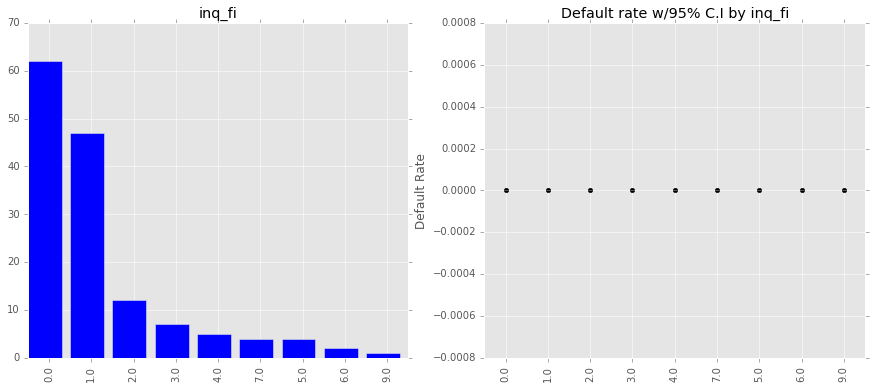

In [1043]:
explore_column(lc_data, 'inq_fi')

* **inq_fi**

---------------------------
total_cu_tl: dtype=float64, 252576 nulls, count vals=18
Total number of distinct values: 18
      Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
0.0      78  78.0       0.0     0.0         0.0      0.0      0.0    0.0
15.0      1   1.0       0.0     0.0         0.0      0.0      0.0   15.0
13.0      1   1.0       0.0     0.0         0.0      0.0      0.0   13.0
11.0      1   1.0       0.0     0.0         0.0      0.0      0.0   11.0
10.0      1   1.0       0.0     0.0         0.0      0.0      0.0   10.0
9.0       1   1.0       0.0     0.0         0.0      0.0      0.0    9.0
18.0      1   1.0       0.0     0.0         0.0      0.0      0.0   18.0
8.0       2   2.0       0.0     0.0         0.0      0.0      0.0    8.0
6.0       2   2.0       0.0     0.0         0.0      0.0      0.0    6.0
5.0       2   2.0       0.0     0.0         0.0      0.0      0.0    5.0
12.0      3   3.0       0.0     0.0         0.0      0.0      0.0   12.0
7.0 

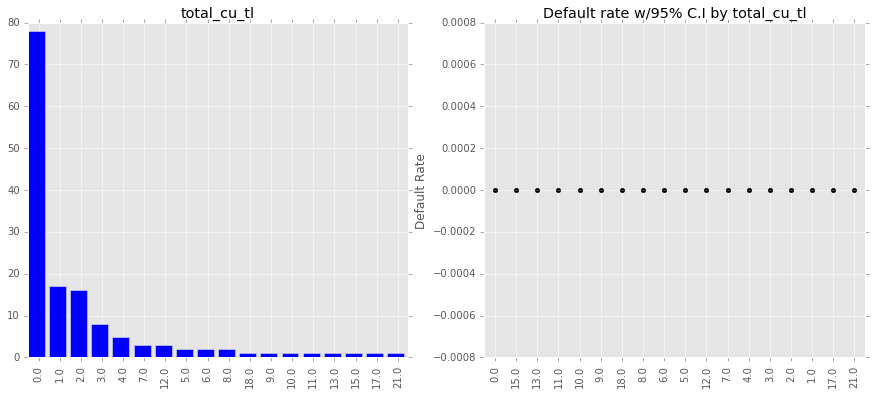

In [1044]:
explore_column(lc_data, 'total_cu_tl')

* **total_cu_tl**

---------------------------
inq_last_12m: dtype=float64, 252576 nulls, count vals=17
Total number of distinct values: 17
       Total  Good  Defaults  StdErr  % Defaults  Lo Conf  Hi Conf  Label
 2.0      30  30.0       0.0     0.0         0.0      0.0      0.0    2.0
 15.0      1   1.0       0.0     0.0         0.0      0.0      0.0   15.0
 13.0      1   1.0       0.0     0.0         0.0      0.0      0.0   13.0
 19.0      1   1.0       0.0     0.0         0.0      0.0      0.0   19.0
 11.0      1   1.0       0.0     0.0         0.0      0.0      0.0   11.0
 12.0      3   3.0       0.0     0.0         0.0      0.0      0.0   12.0
 5.0       4   4.0       0.0     0.0         0.0      0.0      0.0    5.0
 16.0      1   1.0       0.0     0.0         0.0      0.0      0.0   16.0
 10.0      4   4.0       0.0     0.0         0.0      0.0      0.0   10.0
 7.0       6   6.0       0.0     0.0         0.0      0.0      0.0    7.0
 6.0       8   8.0       0.0     0.0         0.0      0.0      0.

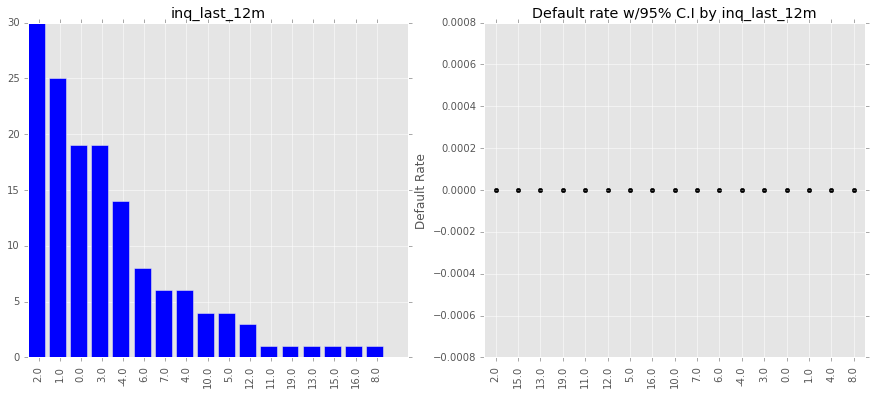

In [1045]:
explore_column(lc_data, 'inq_last_12m')

* **inq_last_12m**

In [1046]:
# What can we derive from desc?
import re

def amg_clean_desc(s):
    if pd.isnull(s):
        return ''
    s = re.sub(r'Borrower added on \d+/\d+/\d+ > ', '', s)
    s = s.replace('<br>', ' ')
    s = re.sub(r'\s+', ' ', s)
    s = s.strip()
    
    return s

# TODO Why does this warn?
lc_data['clean_desc'] = lc_data['desc'].apply(amg_clean_desc)
lc_data['clean_desc']

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0               I need to upgrade my business technologies.
1         I plan to use this money to finance the motorc...
2                                                          
3         to pay for property tax (borrow from friend, n...
5                                                          
7                                    Downpayment for a car.
8         I own a small home-based judgment collection b...
9         I'm trying to build up my credit history. I li...
10        I had recived a loan from Citi Financial about...
11                                                         
12        Plan to pay off 2 charge accounts. I will clos...
13        I intend to pay this debt off within half the ...
14                                                         
15                                                         
16                                                         
17        Payoff other lending club acct and pull out mo...
18        This is a loan i am really loo

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


---------------------------
desc_len: dtype=int64, 0 nulls, count vals=2065
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00       76.00      582.00     3943.00
BAD        0.00        0.00        0.00        0.00       58.00      514.00     3853.00


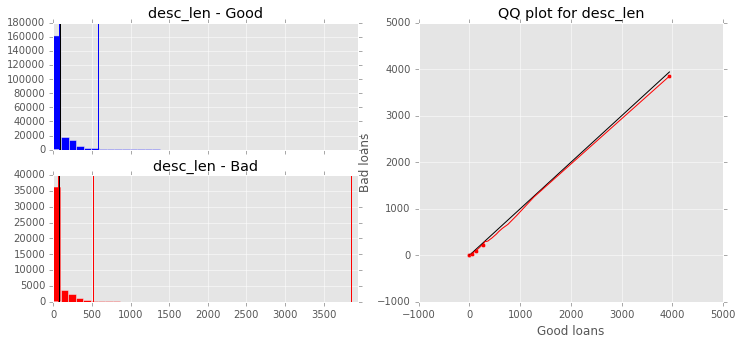

In [1047]:
lc_data['desc_len'] = lc_data['clean_desc'].str.len()
explore_column(lc_data, 'desc_len')

In [1048]:
sil_wordlist = set((s[:-1] for s in open('data/wordlist.txt').readlines()))

In [1049]:
sil_wordlist

{'biennials',
 '',
 'reallocations',
 'jinrikishas',
 'gerontotherapy',
 'impotents',
 'localizes',
 'pawnor',
 'gemmologist',
 'chameleons',
 'clotted',
 'spiders',
 'verses',
 'hanging',
 'woody',
 'trawling',
 'comically',
 'localized',
 'spidery',
 'regularize',
 'beadsmen',
 'caner',
 'canes',
 'cycling',
 'localizer',
 'allotypic',
 'allyls',
 'caned',
 'purulently',
 'crossbar',
 'bioclimatology',
 'inviolately',
 'slothful',
 'naturopathic',
 'grenadiers',
 'trojan',
 'pigment',
 'copout',
 'potentiometers',
 'bogyman',
 'transvestism',
 'bringing',
 'bookrests',
 'wooded',
 'prissiest',
 'grueling',
 'vibrational',
 'wooden',
 'wednesday',
 'virtuosos',
 'signalizing',
 'circuitry',
 'crotch',
 'amplifications',
 'shows',
 'immunities',
 'suppressible',
 'pizzle',
 'gaskets',
 'snuggles',
 'complainers',
 'accusatorial',
 'atavic',
 'deadheads',
 'clavicular',
 'tomographies',
 'consenting',
 'hellgrammites',
 'suffixal',
 'prosody',
 'inanimate',
 'errors',
 'dialogs',
 'estr

In [1050]:
def amg_misspellings(s):
    return min(30, sum([1 for w in s.lower().split()
                if len(w) > 1 and not w in sil_wordlist]))

In [1051]:
lc_data['desc_misspellings_count'] = np.vectorize(amg_misspellings)(lc_data['clean_desc'])

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


---------------------------
desc_misspellings_count: dtype=int32, 0 nulls, count vals=31
            Min        2.5%         25%         50%         75%       97.5%         Max
GOOD       0.00        0.00        0.00        0.00        1.00       14.00       30.00
BAD        0.00        0.00        0.00        0.00        1.00       12.00       30.00


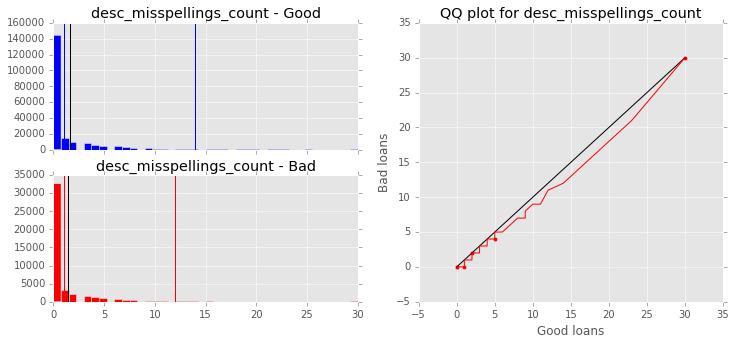

In [1052]:
explore_column(lc_data, 'desc_misspellings_count')     

[   500.   4725.   6250.   8000.  10000.  12000.  14400.  16500.  20000.
  25000.  35000.]
year  default
2008  False                [1571, 519, 219, 160, 58, 60, 43, 0, 0]
      True                     [276, 77, 52, 37, 14, 17, 21, 0, 0]
2009  False            [4865, 1249, 768, 721, 229, 265, 147, 0, 0]
      True                  [692, 162, 104, 111, 37, 49, 33, 0, 0]
2010  False         [11768, 2822, 1705, 1730, 641, 617, 793, 0, 0]
      True               [1758, 387, 260, 213, 116, 89, 143, 0, 0]
2011  False      [19139, 4581, 2663, 2924, 1037, 988, 682, 430,...
      True          [3678, 754, 403, 569, 287, 245, 200, 105, 169]
2012  False      [45760, 9645, 8269, 7561, 3855, 3373, 1916, 11...
      True       [8780, 1473, 1517, 1223, 1110, 801, 528, 353, ...
2013  False      [60095, 10555, 10834, 10505, 6647, 5798, 3760,...
      True       [15742, 2503, 2813, 2419, 1905, 1630, 1143, 73...
2014  False      [58957, 11326, 9772, 10637, 5358, 5026, 3330, ...
      True       [14822,

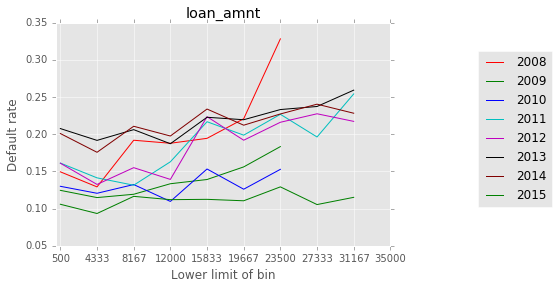

In [1053]:
# does the default rate per decile over time change?
def explore_default_rate_per_decile_per_year(data, colname):
    col_data = data[colname]
    #if col_data.dtype == '<M8[ns]':
    #    col_data = col_data.dt.strftime('%Y-%m')
    defaults = data['loan_status'] == 'Charged Off'  # for now TODO
    years = data['issue_d'].dt.year

    nulls = pd.isnull(col_data)
    d = pd.DataFrame(col_data[~nulls])
    d['default'] = defaults[~nulls]
    d['year'] = years[~nulls]
    
    deciles = np.percentile(d[colname], range(0, 101, 10))
    print deciles
    # actually that gets messy
    deciles = np.linspace(d[colname].min(), d[colname].max(), 10)
    def amg_histogram(s):
        return np.histogram(s, bins=deciles)[0]
    results = d.groupby(['year', 'default']).apply(amg_histogram)
    print results
    print results.index
    
    colors = ['r', 'g', 'b', 'c', 'm', 'k', '#800000', '#008000', '#000080']
    for year in results.index.levels[0]:
        plt.plot(deciles[:-1], 
                 results[year][True] * 1.0/(results[year][True] + results[year][False]),
                 label=str(year),
                 color=colors[0]
                )
        colors = colors[1:]
    plt.gca().set_xticks(deciles)
    plt.xlabel("Lower limit of bin")
    plt.ylabel("Default rate")
    plt.title(colname)
    plt.legend(bbox_to_anchor=(1.5, 0.9))
                 
    plt.show()
    return results
    
results = explore_default_rate_per_decile_per_year(lc_data, 'loan_amnt')

In [1054]:
results.index

MultiIndex(levels=[[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015], [False, True]],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=[u'year', u'default'])

In [1055]:
for year in results.index.levels[0]:
    print year, results[year][True] * 1.0/(results[year][True] + results[year][False])

2008 [ 0.14943151  0.12919463  0.19188192  0.18781726  0.19444444  0.22077922
  0.328125           nan         nan]
2009 [ 0.12452762  0.11481219  0.11926606  0.13341346  0.13909774  0.15605096
  0.18333333         nan         nan]
2010 [ 0.12997191  0.12059832  0.13231552  0.10962429  0.15323646  0.12606232
  0.15277778         nan         nan]
2011 [ 0.1611956   0.14133083  0.13144162  0.16289722  0.21676737  0.19870235
  0.22675737  0.19626168  0.25413534]
2012 [ 0.16098276  0.13248786  0.15501737  0.13923042  0.22356495  0.19190225
  0.21603928  0.22744845  0.21724334]
2013 [ 0.20757678  0.19168326  0.20612589  0.18717115  0.22275491  0.21943996
  0.23312258  0.23724984  0.25919788]
2014 [ 0.20089727  0.17569141  0.21066236  0.19757091  0.23380523  0.21210221
  0.22719889  0.24035608  0.22818983]
2015 [ 0.10582669  0.09341531  0.11646586  0.11202422  0.11244813  0.11051546
  0.12921348  0.10542636  0.11514393]


Clearly, the month of loan issue can act as a proxy for economic conditions at the time and has a significant impact on the default rate. We can adjust for that and start examining the residuals

In [92]:
lc_data['defaulted'] = lc_data['loan_status'] == 'Charged Off'  # for now TODO

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
lc_data.defaulted.index

Int64Index([     0,      1,      2,      3,      5,      7,      8,      9,
                10,     11,
            ...
            887308, 887330, 887332, 887346, 887347, 887351, 887364, 887366,
            887369, 887371],
           dtype='int64', length=252720)

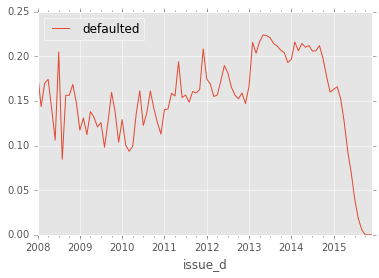

In [1057]:
baseline_default_rate = pd.DataFrame(lc_data.groupby(lc_data.issue_d).defaulted.mean())
baseline_default_rate.plot()

In [1058]:
lc_data['marginal_result'] = lc_data.defaulted - lc_data.merge(baseline_default_rate, 
                                                               left_on='issue_d',
                                                               right_index=True,
                                                               suffixes=('', '_r')
                                                              ).defaulted_r

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


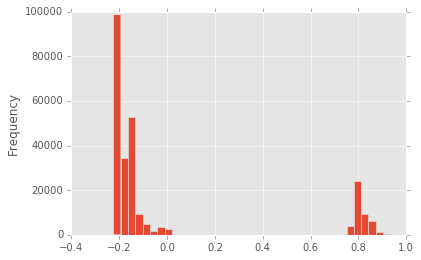

In [1059]:
lc_data['marginal_result'].plot(kind='hist', bins=40)

OK, so now we have the marginal_result column... what next?

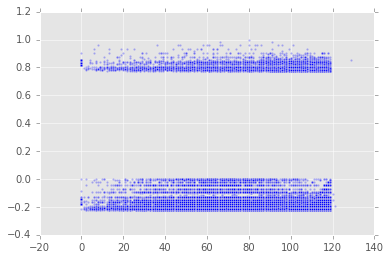

In [1060]:
plt.scatter(lc_data['mths_since_last_record'], 
            lc_data['marginal_result'],
            alpha=0.3,
            marker='.',
           )

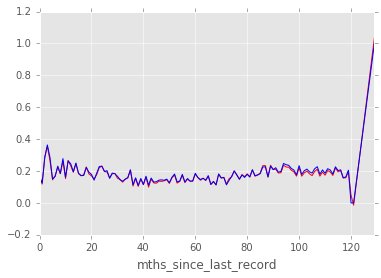

In [1061]:
delta = lc_data.defaulted.mean() - lc_data.marginal_result.mean()

(lc_data.groupby('mths_since_last_record').marginal_result.mean() + delta).plot(c='r')
lc_data.groupby('mths_since_last_record').defaulted.mean().plot(c='b')

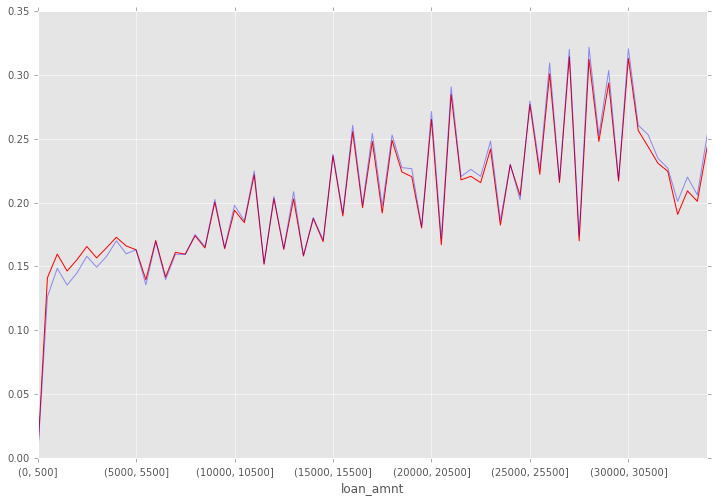

In [1062]:
plt.figure(figsize=(12,8))
(lc_data.groupby(pd.cut(lc_data['loan_amnt'], np.arange(0, 35000, 500))).marginal_result.mean() + delta).plot(c='r')
lc_data.groupby(pd.cut(lc_data['loan_amnt'], np.arange(0, 35000, 500))).defaulted.mean().plot(c='b', alpha=.4)

# Start creating models

In [10]:
predictors = [
    'loan_amnt',
    'term',
#    'desc',
    'purpose',
#    'title',
    'initial_list_status',
    'application_type',
    'emp_title',
#    'emp_length',  ## N/A would be good
    'home_ownership',
    'annual_inc',
    'verification_status',
#    'zip_code',
]

unused_predictors = [
    'addr_state',
    'dti',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'mths_since_last_delinq',
    'mths_since_last_record',
    'open_acc',
    'pub_rec',
    'revol_bal',
    'revol_util',
    'total_acc',
    'mths_since_last_major_derog',
    'collections_12_mths_ex_med',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'total_rev_hi_lim',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m'
]

In [101]:
def dummy_column(colname, colvalues = None):
    if colvalues is None:
        colvalues = sorted(list(set(lc_data[colname].values)))
    for colvalue in colvalues:
        lc_pred[colname + '__' + str(colvalue).replace(' ', '_')] = 1 * (lc_data[colname] == colvalue)
    
# start with numeric continuous predictors that can just be copied
lc_pred = lc_data[['loan_amnt', 'annual_inc', 'dti', 
                   'inq_last_6mths']] # 'mths_since_last_record']]
# derive things from the categoricals
lc_pred['short_term'] = lc_data['term'] == '36 months'
lc_pred['emp_na'] = lc_data['emp_length'] == 'n/a'
dummy_column('home_ownership', ['OWN', 'RENT', 'MORTGAGE'])
dummy_column('verification_status')
# dummy_column('emp_title')  # causes problems
dummy_column('purpose')
dummy_column('addr_state')
dummy_column('initial_list_status', 'w')
lc_pred.describe().T

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,count,mean,std,min,25%,50%,75%,max
loan_amnt,252720.0,13567.457760,8131.876498,500.0,7250.00,12000.0,18250.0,35000.00
annual_inc,252720.0,72538.524725,58807.739203,3000.0,45000.00,62000.0,87000.0,8706582.00
dti,252720.0,16.550295,7.787279,0.0,10.76,16.2,22.0,57.14
inq_last_6mths,252720.0,0.852327,1.066765,0.0,0.00,1.0,1.0,8.00
home_ownership__OWN,252720.0,0.086906,0.281698,0.0,0.00,0.0,0.0,1.00
home_ownership__RENT,252720.0,0.418752,0.493356,0.0,0.00,0.0,1.0,1.00
home_ownership__MORTGAGE,252720.0,0.493617,0.499960,0.0,0.00,0.0,1.0,1.00
verification_status__Not_Verified,252720.0,0.339558,0.473560,0.0,0.00,0.0,1.0,1.00
verification_status__Source_Verified,252720.0,0.292858,0.455075,0.0,0.00,0.0,1.0,1.00
verification_status__Verified,252720.0,0.367585,0.482148,0.0,0.00,0.0,1.0,1.00


In [219]:
print lc_pred.shape

(252720, 78)


In [91]:
print lc_data.iloc[-1,:]

id                                        36260758
member_id                                 38972123
loan_amnt                                    10850
funded_amnt                                  10850
funded_amnt_inv                              10850
term                                     36 months
int_rate                                     19.24
installment                                 399.04
grade                                            E
sub_grade                                       E2
emp_title                                      NaN
emp_length                                     n/a
home_ownership                                 OWN
annual_inc                                   32000
verification_status                       Verified
issue_d                        2015-01-01 00:00:00
loan_status                            Charged Off
pymnt_plan                                       n
desc                                           NaN
purpose                        

In [214]:
# outcomes:
lc_Y = pd.DataFrame(lc_data.defaulted)
#lc_Y

In [217]:
baseline_default_rate = pd.DataFrame(lc_data[['issue_d', 'defaulted']].groupby('issue_d').defaulted.mean())
lc_Y['marginal_result'] = lc_data.defaulted - lc_data[['issue_d', 'defaulted']].merge(baseline_default_rate, 
                                                               left_on='issue_d',
                                                               right_index=True,
                                                               suffixes=('', '_r')
                                                              ).defaulted_r
#lc_Y

In [215]:
log_reg = Log_Reg().fit(lc_pred, lc_Y.defaulted)
print log_reg.score(lc_pred, lc_Y.defaulted), 1-lc_Y.defaulted.mean()

0.821134061412 0.821134061412


In [218]:
print Lin_Reg().fit(lc_pred, lc_Y.marginal_result).score(lc_pred, lc_Y.marginal_result)

0.0340126051893


In [114]:
def try_random_forest():
    X_raw = lc_pred
    X_std = X_raw.std(axis=0)
    # print X_std < 1e-10  # TODO: short-term is the bad one
    X_std[X_std < 1e-10] = 1
    X = (X_raw - X_raw.mean(axis=0))/X_std
    y = lc_Y.defaulted
    rf_model = ensemble.RandomForestClassifier(
        random_state=1729,
        max_depth=20,
        n_estimators=200,
        oob_score=True
    ).fit(X, y)
    print "Simplest Random Forest has oob=", rf_model.oob_score_

try_random_forest()

Simplest Random Forest has oob= 0.821122190567


In [129]:
# What about some PCA?
import sklearn.decomposition
pca = sklearn.decomposition.PCA().fit(lc_pred)
lc_pred_pca = pd.DataFrame(pca.transform(lc_pred))

In [133]:
print lc_pred_pca.shape, lc_Y.shape, lc_Y.defaulted.shape

(252720, 78) (252720, 2) (252720L,)


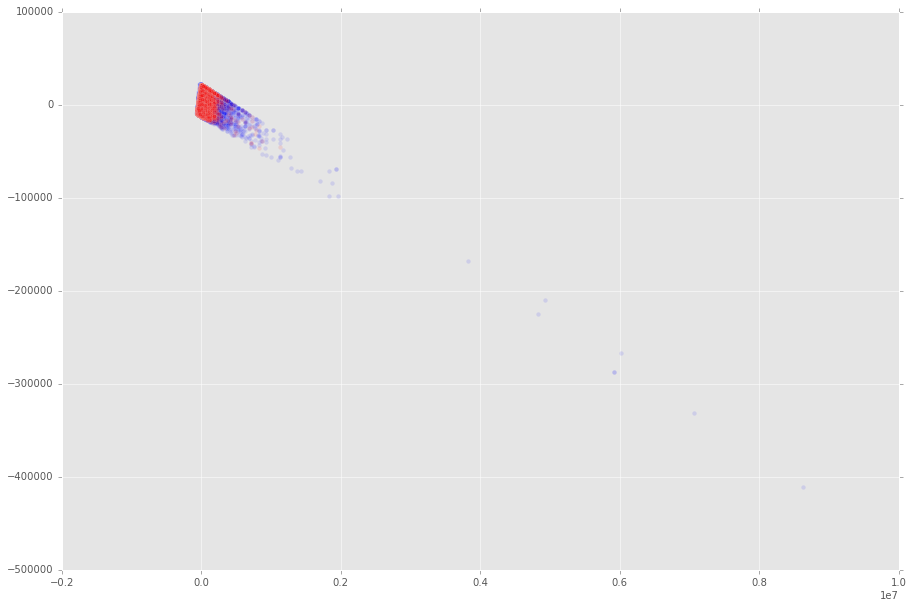

In [205]:
plt.figure(figsize=(15,10))
plt.scatter(lc_pred_pca[~lc_data.reindex(lc_pred_pca.index).defaulted.fillna(False)].iloc[:,0],
            lc_pred_pca[~lc_data.reindex(lc_pred_pca.index).defaulted.fillna(False)].iloc[:,1],
            alpha=.1,
            c='b',
           )
plt.scatter(lc_pred_pca[lc_data.reindex(lc_pred_pca.index).defaulted.fillna(False)].iloc[:,0],
            lc_pred_pca[lc_data.reindex(lc_pred_pca.index).defaulted.fillna(False)].iloc[:,1],
            alpha=.1,
            c='r',
           )
plt.show()

In [199]:
log_reg = Log_Reg().fit(lc_pred_pca.iloc[:,0:3], lc_Y.defaulted)
for threshold in np.arange(0, 1, 0.05):
    yhat = log_reg.predict_proba(lc_pred_pca.iloc[:,0:3])[:,0] > threshold
    print threshold, (yhat == lc_Y.defaulted).mean()
    # TODO: separate false positives from false negatives, or look at F-score

0.0 0.178865938588
0.05 0.178865938588
0.1 0.178865938588
0.15 0.178865938588
0.2 0.178865938588
0.25 0.178865938588
0.3 0.178865938588
0.35 0.178865938588
0.4 0.178865938588
0.45 0.178865938588
0.5 0.178865938588
0.55 0.178865938588
0.6 0.178917378917
0.65 0.180033238367
0.7 0.188303260525
0.75 0.228015194682
0.8 0.348298512187
0.85 0.56821779044
0.9 0.760110003166
0.95 0.812749287749


In [212]:
for i in range(2,10):
    lin_reg = Lin_Reg().fit(lc_pred_pca.iloc[:,0:i], lc_Y.marginal_result)
    print i, lin_reg.score(lc_pred_pca.iloc[:,0:i], lc_Y.marginal_result)

2 0.0092419701188
3 0.0174031215618
4 0.0204731551396
5 0.0245713729821
6 0.0247123604715
7 0.0249906605582
8 0.0262668001739
9 0.0266576762321


In [178]:
print lc_pred_pca.index
print lc_data.defaulted.reindex(lc_pred_pca.index).index

RangeIndex(start=0, stop=252720, step=1)
RangeIndex(start=0, stop=252720, step=1)


In [201]:
def try_random_forest_pca():
    X_raw = lc_pred_pca
    X_std = X_raw.std(axis=0)
    # print X_std < 1e-10  # TODO: short-term is the bad one
    X_std[X_std < 1e-10] = 1
    X = (X_raw - X_raw.mean(axis=0))/X_std
    y = lc_Y.defaulted
    rf_model = ensemble.RandomForestClassifier(
        random_state=1729,
        max_depth=20,
        n_estimators=200,
        oob_score=True
    ).fit(X, y)
    print "Simplest Random Forest has oob=", rf_model.oob_score_

try_random_forest_pca()

Simplest Random Forest has oob= 0.819590851535


In [209]:
# TODO: simplify states by coding with mean default rate for state
# TODO: K-fold CV on some models

In [220]:
lc_subset = lc_pred[['home_ownership__OWN', 
'home_ownership__RENT',
'home_ownership__MORTGAGE', 
'verification_status__Not_Verified',
'verification_status__Source_Verified',
'verification_status__Verified',]]

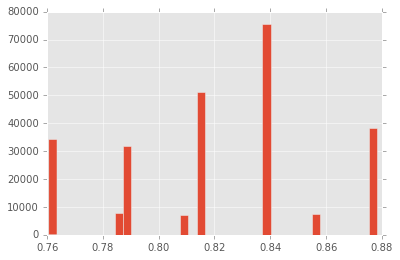

In [235]:
plt.hist(Log_Reg().fit(lc_subset, lc_Y.defaulted).predict_proba(lc_subset)[:,0], bins=40)
plt.show()

In [237]:
from sklearn.preprocessing import PolynomialFeatures
lc_poly = PolynomialFeatures().fit_transform(lc_pred)

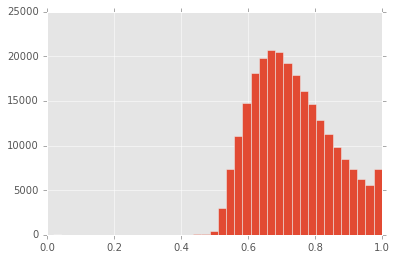

In [238]:
plt.hist(Log_Reg().fit(lc_poly, lc_Y.defaulted).predict_proba(lc_poly)[:,0], bins=40)
plt.show()

In [239]:
Log_Reg().fit(lc_poly, lc_Y.defaulted).score(lc_poly, lc_Y.defaulted)

0.82043763849319407

In [10]:
lc_data.groupby(lc_data.issue_d.dt.year).id.agg({'min': np.min, 'max': np.max, 'count': len})

,count,max,min
issue_d,,,
2008,1562,369713,55742
2009,4716,472744,54734
2010,11521,643218,57245
2011,19675,1077501,296737
2012,49563,2837824,58524
2013,71232,10234817,380041
2014,68694,37854157,57167
2015,25757,68604659,70000


In [11]:
# Play with returns

In [12]:
raw_lc_data.tot_coll_amt.describe()

C:\Users\agreene\AppData\Local\Continuum\Anaconda2\envs\amg1\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    8.171030e+05
mean     2.257026e+02
std      1.031137e+04
min      0.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      9.152545e+06
Name: tot_coll_amt, dtype: float64

In [26]:
raw_lc_data.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

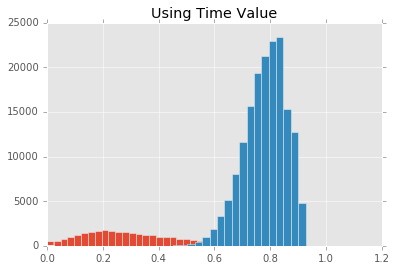

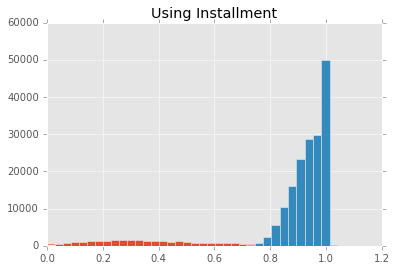

,loan_status,loan_amnt,int_rate,total_pymnt,installment,out_prncp,expected_payment,expected_payment_2,ratio,ratio_2
699492,Charged Off,4000.0,10.99,0.000000,130.94,0.0,5553.863240,4713.84,0.000000,0.000000
695889,Charged Off,14000.0,12.29,0.000000,466.95,0.0,20204.029634,16810.20,0.000000,0.000000
695523,Charged Off,7000.0,9.17,0.000000,223.16,0.0,9207.002742,8033.76,0.000000,0.000000
693374,Charged Off,2200.0,14.65,0.000000,75.89,0.0,3405.174601,2732.04,0.000000,0.000000
687965,Charged Off,5550.0,12.69,0.000000,186.18,0.0,8105.145089,6702.48,0.000000,0.000000
686363,Charged Off,10000.0,16.99,0.000000,356.48,0.0,16588.514230,12833.28,0.000000,0.000000
202267,Charged Off,15000.0,17.77,0.000000,540.56,0.0,25463.386055,19460.16,0.000000,0.000000
35255,Charged Off,20000.0,17.39,0.000000,716.95,0.0,33571.861152,25810.20,0.000000,0.000000
835958,Charged Off,12000.0,7.89,0.000000,375.43,0.0,15192.955898,13515.48,0.000000,0.000000
406682,Charged Off,20000.0,9.67,0.000000,642.25,0.0,26700.162565,23121.00,0.000000,0.000000


In [41]:
returns = raw_lc_data[(raw_lc_data.term == ' 36 months')
                      & (raw_lc_data.loan_status.isin(['Fully Paid', 'Charged Off']))
                     ][['loan_status', 'loan_amnt', 'int_rate', 'total_pymnt', 'installment', 'out_prncp'
#                        'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp'
                     ]]
returns['expected_payment'] = returns.loan_amnt * (1 + returns.int_rate/1200) ** 36
returns['expected_payment_2'] = returns.installment * 36
# returns['total_computed_pymnt'] = returns.total_rec_int + returns.total_rec_late_fee + returns.total_rec_prncp
returns['ratio'] = returns['total_pymnt'] / returns['expected_payment']
# Plot distribution
returns[returns.ratio<1.2].groupby('loan_status').ratio.hist(bins=40)
plt.title("Using Time Value")
plt.show()

returns['ratio_2'] = returns['total_pymnt'] / returns['expected_payment_2']
# Plot distribution
returns[returns.ratio_2<1.2].groupby('loan_status').ratio_2.hist(bins=40)
plt.title("Using Installment")
plt.show()
# Display the extremes
returns.sort_values('ratio')